In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Preprocesamiento de los datos

#### Consigna 1

Leer los datos del archivo `tabla_nutricional.csv`. Completar las celdas faltantes con ceros y asegurarse de que todos los datos estén en la misma unidad.


In [483]:
#importación de datos
tabla_nutricional = pd.read_csv('tabla_nutricional.csv', sep=';')

#remplazo de valores nulos por 0
tabla_nutricional.fillna(0, inplace=True)

#alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
#tabla_nutricional = tabla_nutricional.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
#tabla_nutricional = tabla_nutricional.mul(100 / tabla_nutricional['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
#tabla_nutricional['Alimento'] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
tabla_nutricional['Na (gr)'] = tabla_nutricional['Na (mg)']/1000  #divido por mil las columnas con mg para obtener gr
tabla_nutricional['Ca (gr)'] = tabla_nutricional['Ca (mg)']/1000
tabla_nutricional['Fe (gr)'] = tabla_nutricional['Fe (mg)']/1000
cols = tabla_nutricional.columns # Na (mg);Ca (mg);Fe (mg);
cols_to_drop = [col for col in cols if 'mg' in col] #elimino las columnas con mg
tabla_nutricional.drop(cols_to_drop, axis=1, inplace=True)

tabla_nutricional_clean = tabla_nutricional
tabla_nutricional.head(10)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.0,1.62,0.77,0.060,0.0,0.04444,0.09900,0.000060
2,Yogurt,19.00,2.45,0.51,0.49,0.0,0.32,0.14,0.014,0.0,0.00799,0.01767,0.000005
3,Queso crema,1.66,0.06,0.10,0.37,0.0,0.36,0.11,0.010,0.0,0.00123,0.00093,0.000000
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.0,0.76,0.21,0.020,0.0,0.02084,0.01654,0.000000
5,Queso rallar,1.66,0.06,0.55,0.45,0.0,0.36,0.11,0.008,0.0,0.02042,0.01578,0.000000
6,Huevo,16.00,0.00,1.92,1.89,0.0,0.51,0.72,0.460,0.0,0.02160,0.00896,0.000400
7,Asado,50.00,0.00,9.30,7.50,0.0,2.93,3.27,0.189,0.0,0.03300,0.00750,0.001120
8,Paleta,15.00,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340
9,Hueso c/carne,15.00,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340


### Testeo

In [484]:
#imprimir la cantidad de gramos de comida
#print(tabla_nutricional['Cantidad (gr/ml)'])
#ahora la suma total
#print(tabla_nutricional['Cantidad (gr/ml)'].sum())
print(tabla_nutricional.shape)
print(tabla_nutricional.sum(axis=0))


(57, 13)
Alimento                Leche fluida enteraLeche entera en polvoYogurt...
Cantidad (gr/ml)                                                  1897.97
HC (gr)                                                           410.235
Proteinas (gr)                                                    112.413
Grasas (gr)                                                        76.911
Azucares Libres (gr)                                                56.75
AGS (gr)                                                           26.182
AGNI (gr)                                                          27.468
AG p (gr)                                                          28.087
Fibra (gr)                                                          21.26
Na (gr)                                                          3.337714
Ca (gr)                                                           0.71888
Fe (gr)                                                          0.023538
dtype: object


# Consigna 2

Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta (proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras) cumplen los márgenes de ingesta de la OMS. Esta función debe devolver VERDADERO si los cumple.

Para verificar la Canasta Básica con esta función, asegúrate de pasar el DataFrame correspondiente que contiene las cantidades de estos elementos.


In [485]:
"""
Recibe como parámetro un DataFrame y evalúa si las cantidades de los principales elementos de la dieta, 
proteínas, carbohidratos, grasas, sodio, fibra, frutas y verduras, 
cumple los márgenes de ingesta de la OMS:
"""
condiciones = """
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia
"""

def oms_check (df:pd.DataFrame):

    print("Condiciones OMS:", condiciones)

    #listamos manualmente las frutas y verduras de la lista de alimentos
    lista_fru_y_ver = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 'Mandarina', 'Pera', 'Banana', 'Papa', 'Batata']
    #filtramos las frutas y verduras, seleccionamos la columna de cantidad en gr y sumamos
    fru_y_ver = df[df['Alimento'].isin(lista_fru_y_ver)]['Cantidad (gr/ml)'].sum()

    #sacamos los alimentos
    df = df.drop('Alimento', axis='columns')

    #tampoco nos importan las columnas de los tipos de grasas: AGS (gr);AGNI (gr);AG p (gr);
    df = df.drop(['AGS (gr)', 'AGNI (gr)', 'AG p (gr)'], axis=1)

    #sumamos cada columna de nutrientes guardamos en un array (sin la de alimentos)
    nutrientes_totales = df.sum().to_numpy()

    #reemplazamos el valor de cantidad por la suma de el resto de las columnas ya que sólo nos interesan los nutrientes netos
    nutrientes_totales[0] = sum(nutrientes_totales[1:])
    
    #*Ahora accedemos al valor sumado en cada columna para hacer los cálculos*

    #lista de columnas
    cols = df.columns
    #buscamos el indice de cada columna en el dataframe
    proteinas_index = cols.get_loc('Proteinas (gr)')
    hc_index = cols.get_loc('HC (gr)')
    grasas_index = cols.get_loc('Grasas (gr)')
    sodio_index = cols.get_loc('Na (gr)')
    fibra_index = cols.get_loc('Fibra (gr)')
    cantidad_index = cols.get_loc('Cantidad (gr/ml)')

    #guardamos los datos de nutrientes usando el indice obtenido
    cantidad = nutrientes_totales[cantidad_index]
    #guardamos directamente los porcentajes de nutrientes sobre la cantidad total
    proteinas = nutrientes_totales[proteinas_index] / cantidad * 100
    hc = nutrientes_totales[hc_index] / cantidad * 100
    grasas = nutrientes_totales[grasas_index] / cantidad * 100
    sodio = nutrientes_totales[sodio_index]
    fibra = nutrientes_totales[fibra_index]

    #generate a dictionary with the results
    results = {'Proteinas': proteinas, 
               'HC': hc, 'Grasas': grasas, 
               'Sodio': sodio, 'Fibra': fibra, 
               'Frutas y Verduras': fru_y_ver}
    
    #imprimimos los resutados de manera informativa

    print('Cantidad total de nutrientes (g):', cantidad)
    
    # for 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 190 < sodio < 210 and fibra > 25000 and fru_y_ver >= 400000 print an array of trues and false
    gramos = [nutrientes_totales[proteinas_index], nutrientes_totales[hc_index], nutrientes_totales[grasas_index], nutrientes_totales[sodio_index], nutrientes_totales[fibra_index], fru_y_ver]
    check = [10 < proteinas < 15, 55 < hc < 75, 15 < grasas < 30, 0.19 < sodio < 0.21, fibra > 25, fru_y_ver >= 400]
    i = 0
    print('---')
    for key, value in results.items():
        print(key, value)
        print('Cantidad (g):', gramos[i])
        print('Resultado:', check[i])
        i += 1
        print('---')

    #finalizamos chequeando que las condiciones dadas de la OMS se cumplan efectivamente (para los 200mg de sodio damos un 10% de tolerancia ya que es difícil que nos de exactamente ese valor)
    return 10 < proteinas < 15 and 55 < hc < 75 and 15 < grasas < 30 and 0.2 <= sodio and fibra > 25 and fru_y_ver >= 400


oms_check(tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de nutrientes (g): 681.649132
---
Proteinas 16.491328855678784
Cantidad (g): 112.41299999999998
Resultado: False
---
HC 60.18272168796659
Cantidad (g): 410.235
Resultado: True
---
Grasas 11.28307752323229
Cantidad (g): 76.911
Resultado: False
---
Sodio 3.337714
Cantidad (g): 3.337714
Resultado: False
---
Fibra 21.26
Cantidad (g): 21.26
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

## Conclusiones:

Observamos que según las condiciones establecidas, la canasta básica no cumple con las metas de la OMS. Particularmente podemos ver:

- Exceso de proteínas
- Falta de grasas
- Exceso en sodio
- Falta de fibras

Veremos como estos valores varían según las modificaciones a lo largo de las consignas.

## Análisis en Componentes Principales

### Consigna 3

Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusters que quedan planteados por la proyección.


#### Observación

Acá copiamos la función del Labo 7 e hicimos algunas modificaciones a la tabla nutricional para que funcione correctamente. En el laboratorio, cada columna era un ejemplo (imagen) y cada fila representaba los valores para una variable en específico.


In [486]:

alimentos = tabla_nutricional['Alimento'] #guardo los alimentos
alimentos_cantidades = tabla_nutricional[['Alimento', 'Cantidad (gr/ml)']] #guardo las cantidades
alimentos_arr = alimentos.to_numpy()
#sacamos los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional.copy()
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos
tabla_nutricional_matriz = tabla_nutricional_matriz.T

def calculoACP(data):
    d, n = data.shape # d, 1444 es la dimensión de los datos, n, 380 es la cantidad de datos
    m=np.mean(data, axis=1) #calculamos la media de los datos por columnas, para cada dimensión (x1, ... xd)
    # np.tile repite la media m, n veces, para que tenga la misma dimensión que data
    # luego la restamos a data para centrar los datos
    X = data - np.tile(m.reshape((len(m), 1)), (1, n))
    # calculamos la matriz de covarianza, que es X*X^T/n
    Mcov = np.dot(X,X.T) / n # Covariance Matrix
    #avals y avects
    D, V = np.linalg.eigh(Mcov)

    # ordenamos los autovalores de mayor a menor, y reordenamos los autovectores de acuerdo a los autovalores
    idx = np.argsort (- D )
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

D, V, X, m = calculoACP(tabla_nutricional_matriz)



En esta celda testeamos la cantidad de componentes necesarios para representar ciertos porcentajes de información correctamente. También tomada del labo 7.

Cantidad de autovectores de representación al 95 %:  3


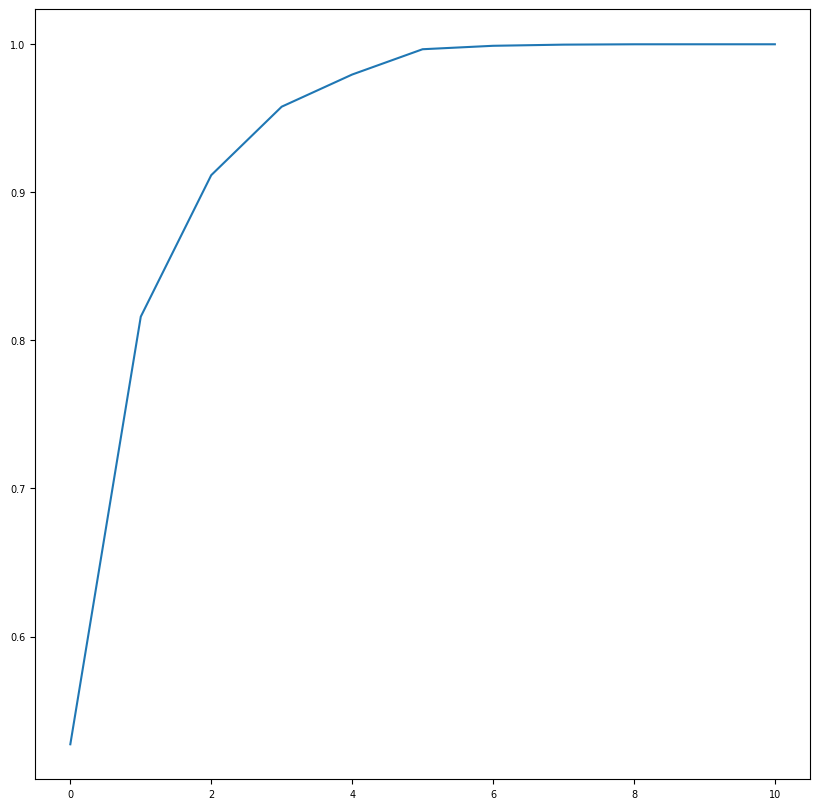

In [487]:
ratio = np.cumsum(D) / np.sum(D)
plt.plot(ratio)
plt.plot(np.cumsum(D[100:])/ np.sum(D))
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)

## Análisis de clusteres

Cantidad de datos:  57 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


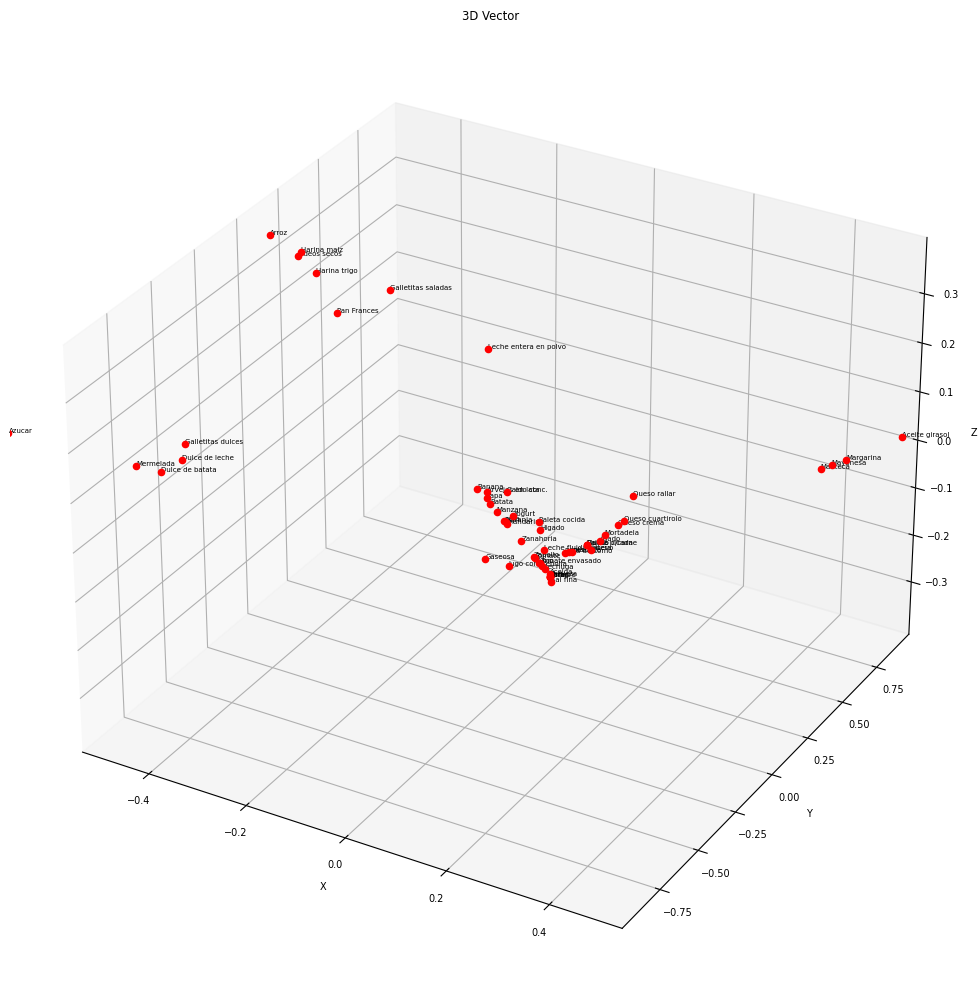

In [488]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=5, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])

# Show the plot
plt.tight_layout()
plt.show()

En este primer gráfico, se pueden observar claramente 4 grupos de alimentos:

- A la izquierda, son todos dulces, casualmente sólo los que son sólidos. Estos alimentos tienen altos niveles de azúcar, a diferencia de los líquidos que pueden tener otras características. El análisis de componentes principales (ACP) resalta esta diferencia notablemente, separando a los líquidos dulces en otro grupo.

- A la derecha, se encuentran los alimentos con el más alto contenido en grasa: manteca, margarina, aceite y mayonesa. El ACP logra distinguirlos claramente del resto.

- Arriba, están los alimentos con alto nivel de hidratos de carbono, principalmente aquellos con harina como ingrediente principal. La leche en polvo también se incluye en este grupo, aunque está más centrada respecto a los demás.

- En el centro, se encuentra el grupo más grande, que será analizado con más profundidad en la siguiente celda.


Procedemos a ajustar los límites en cada eje para ver más claramente el último cluster:

Cantidad de datos:  57 Cantidad de dimensiones:  11


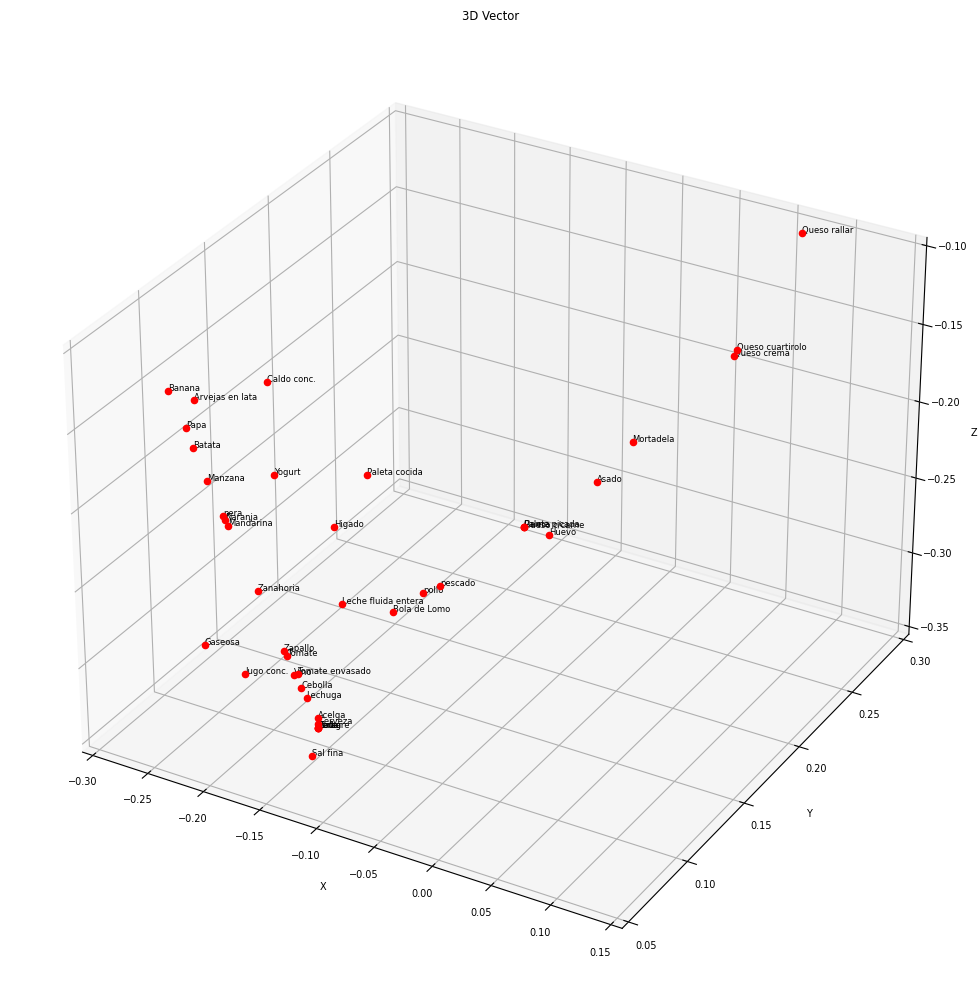

In [489]:
#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # Plot the vector as a point
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_arr[i], size=6, zorder=1, color='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# Set limits for the axes
ax.set_xlim([-0.3, 0.15])
ax.set_ylim([0.05, 0.3])
ax.set_zlim([-0.35, -0.1])

# Show the plot
plt.tight_layout()
plt.show()

Como primera observación, es importante notar que no es casual que todos los alimentos de este grupo sean mucho menos procesados, lo cual se refleja en sus características nutricionales más equilibradas y menos alteradas durante la producción. Estos alimentos no tienen una variable superlativa que los distinga del resto, lo que los hace necesarios para una dieta equilibrada y, por ende, más saludable.

Es notable la inclusión de la gaseosa y el jugo concentrado en este grupo, a pesar de no cumplir con las características mencionadas.

Dentro de este grupo se pueden observar diferentes "ramas" que no están igualmente diferenciadas, pero se puede notar un orden en la posición en ciertas direcciones.

- Se observa una línea recta desde la banana hacia el pequeño grupo de la acelga. Sobre esta línea se encuentran todas las frutas y verduras, lo cual es otro acierto destacable del Análisis de Componentes Principales (ACP).

- También se puede ver otra línea recta desde la bola de lomo hacia el queso de rallar, la cual está dividida en dos subgrupos de la misma categoría: carnes y quesos. Arriba de esta línea están los tres tipos de queso presentes en la tabla. Entre la carne y los quesos se encuentra la mortadela, un fiambre que tiene sentido nutricionalmente por ser una carne con un nivel de sodio más alto. Luego están todas las carnes y el huevo, que son similares nutricionalmente.

Por fuera de estas líneas rectas se encuentran algunos alimentos que no pertenecen a una categoría tan clara como los anteriores, pero se sitúan en posiciones intermedias lógicamente.


# Aumentos de Precios

# Consigna 4
Proyectar los alimentos de la tabla de Consumidores libres en el
espacio de generadores del ACP.

In [490]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')
consumidores_libres.fillna(0, inplace=True)
consumidores_libres.head()

,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0


#### Proyección de los alimentos de la nueva tabla en el mismo espacio de generadores que usamos antes:

Cantidad de datos:  20 Cantidad de dimensiones:  11 Cantidad de autovectores de representación al 95 %:  3


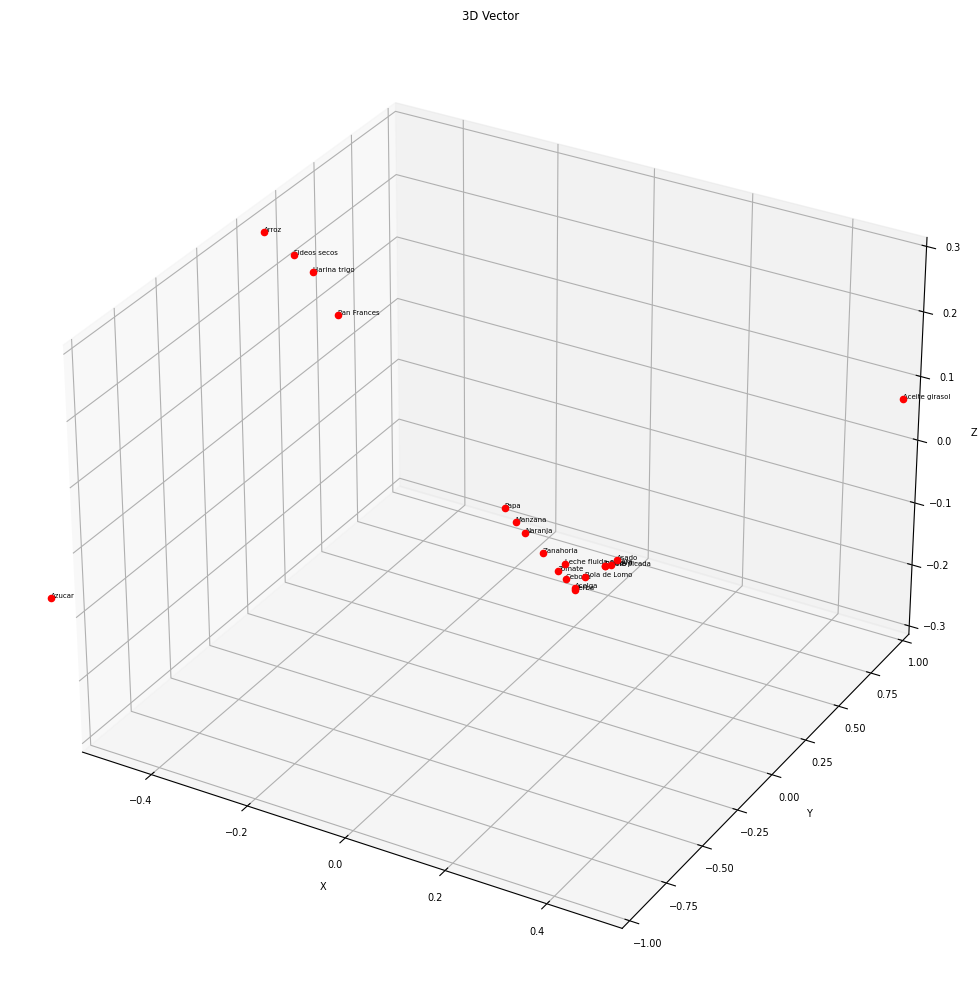

In [491]:

#escribimos a mano los productos de la canasta básica (como están escritos ahí) que están en la tabla de consumidores
productos = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche fluida entera', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Acelga', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta ', 'Carne picada']
no_estan = ['BERENJENAS']

#nueva tabla
tabla_nutricional_matriz = tabla_nutricional.copy()
#filtro los productos que no están en la tabla nutricional
tabla_nutricional_matriz = tabla_nutricional_matriz[tabla_nutricional_matriz['Alimento'].isin(productos)]

alimentos_lista = tabla_nutricional_matriz['Alimento'].to_numpy()
#saco los alimentos para tener sólo números
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Alimento', axis='columns')
#dividimos por la media para que los valores sean comparables
tabla_nutricional_matriz = tabla_nutricional_matriz.mul(1 / tabla_nutricional_matriz['Cantidad (gr/ml)'], axis=0)
#quitamos la columna de cantidad para que no afecte al cálculo
tabla_nutricional_matriz = tabla_nutricional_matriz.drop('Cantidad (gr/ml)', axis='columns')
#print(tabla_nutricional_matriz)
#convertimos a numpy para obtener una matriz 
tabla_nutricional_matriz = tabla_nutricional_matriz.to_numpy() 
#transponemos la tabla para que las columnas sean los alimentos como necesitamos
tabla_nutricional_matriz = tabla_nutricional_matriz.T 
#calculamos el nuevo ACP
D, V, X, m = calculoACP(tabla_nutricional_matriz)

#*Repetimos el proceso anterior:

#proyección de los datos en el espacio de dimensión M
length, cantidad = X.shape
print('Cantidad de datos: ', cantidad, 'Cantidad de dimensiones: ', length, 'Cantidad de autovectores de representación al 95 %: ', M)

proyecciones = np.zeros((cantidad, M))

# Set the font size
plt.rcParams['font.size'] = 7

#set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(cantidad):
    proyecciones[i, :] = X[:,i] @ V[:,0:M]

    # ploteamos el vector como un punto
    ax.scatter(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], c='r', marker='o')
    ax.text(proyecciones[i, 0], proyecciones[i, 1], proyecciones[i, 2], alimentos_lista[i], size=5, zorder=1, color='k')

# nombre a los ejes y titulo del grafico
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector')

# definimos los limites para los ejes
ax.set_xlim([-max(proyecciones[:, 0]), max(proyecciones[:, 0])])
ax.set_ylim([-max(proyecciones[:, 1]), max(proyecciones[:, 1])])
ax.set_zlim([-max(proyecciones[:, 2]), max(proyecciones[:, 2])])
#ax.set_xlim([-max(proyecciones[:, 0])-1, max(proyecciones[:, 0])+1])
#ax.set_ylim([-max(proyecciones[:, 1])-1, max(proyecciones[:, 1])+1])
#ax.set_zlim([-max(proyecciones[:, 2])-1, max(proyecciones[:, 2])+1])

# Show the plot
plt.tight_layout()
plt.show()

# Mínimos Cuadrados

# Consigna 5

Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.

Se tomarán en cuenta los alimentos que están presentes en ambas tablas.


In [492]:
#acá en base a los productos de la tabla de aumentos, 
# busco en qué indice de la tabla nutricional se encuentran
producto_indices = []
for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")
#producto_indices es un array que linkea los productos de la canasta básica con la tabla nutricional
# la posición en producto_indices es la misma que en la tabla de aumentos, 
# el valor, es el índice en la tabla nutricional
print(producto_indices)
print(len(producto_indices))

#elimino los productos que no están en la tabla nutricional de la tabla de aumentos
consumidores_libres = consumidores_libres.drop(consumidores_libres[consumidores_libres['PRODUCTOS'].isin(no_estan)].index)
#agrego una columna con el índice de la tabla nutricional
consumidores_libres['indice'] = producto_indices
consumidores_libres.head()


[33, 27, 44, 30, 28, 6, 26, 0, 56, 16, 17, 19, 31, 15, 22, 21, 11, 7, 8, 10]
20


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,indice
0,ACEITE COCINERO GIRASOL,1500,2500.0,3100.0,3450.0,3600.0,3700.0,33
1,ARROZ GRANO FINO,1000,1650.0,2300.0,2800.0,3100.0,3550.0,27
2,AZUCAR LEDESMA,1000,1990.0,2050.0,2050.0,2100.0,2100.0,44
3,FIDEOS GUISEROS,500,1600.0,1990.0,2150.0,2200.0,2290.0,30
4,HARINA DE TRIGO,1000,950.0,1250.0,1350.0,1500.0,1690.0,28


In [493]:
alimentos = consumidores_libres[['PRODUCTOS', 'indice']] #guardo los alimentos
consumidores_libres = consumidores_libres.drop('PRODUCTOS', axis='columns').drop('indice', axis='columns') #saco los alimentos para tener sólo números
consumidores_libres = consumidores_libres.mul(1 / consumidores_libres['Cantidad'], axis=0) #obtengo todas las filas a 1 gr
consumidores_libres[['PRODUCTOS', 'indice']] = alimentos # agrego alimentos devuelta
#tabla_nutricional = tabla_nutricional[['Alimento'] + [col for col in tabla_nutricional.columns] if col != ['Alimento']] #reordeno
consumidores_libres.head()

#lo mismo con la tabla nutricional

#elimino los que no están en los aumentos de la tabla nutricional
#print(tabla_nutricional.shape)
#tabla_nutricional = tabla_nutricional.drop(tabla_nutricional[~tabla_nutricional['Alimento'].isin(productos)].index)
#print(tabla_nutricional.shape)

#primero paso el aceite (92g por cada 100ml) a gramos (la leche es equivalente a 1g/ml)
tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)'] = tabla_nutricional.loc[tabla_nutricional['Alimento'] == 'Aceite girasol', 'Cantidad (gr/ml)']*0.92

alimentos = tabla_nutricional['Alimento'] #guardo los alimentos

tabla_nutricional_precios = tabla_nutricional.copy()

tabla_nutricional_precios = tabla_nutricional_precios.drop('Alimento', axis='columns') #saco los alimentos para tener sólo números
tabla_nutricional_precios = tabla_nutricional_precios.mul(1 / tabla_nutricional_precios['Cantidad (gr/ml)'], axis=0) #obtengo todas las filas a 100 gr
tabla_nutricional_precios['Alimento'] = alimentos # agrego alimentos devuelta
tabla_nutricional_precios = tabla_nutricional_precios[['Alimento'] + [col for col in tabla_nutricional_precios.columns if col != 'Alimento']] #reordeno
tabla_nutricional_precios.head()


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,1.0,0.046000,0.031000,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.000570,0.001050,7.000000e-07
1,Leche entera en polvo,1.0,0.410000,0.258182,0.248182,0.0,0.147273,0.070000,0.005455,0.0,0.004040,0.009000,5.454545e-06
2,Yogurt,1.0,0.128947,0.026842,0.025789,0.0,0.016842,0.007368,0.000737,0.0,0.000421,0.000930,2.631579e-07
3,Queso crema,1.0,0.036145,0.060241,0.222892,0.0,0.216867,0.066265,0.006024,0.0,0.000741,0.000560,0.000000e+00
4,Queso cuartirolo,1.0,0.016393,0.210383,0.218579,0.0,0.207650,0.057377,0.005464,0.0,0.005694,0.004519,0.000000e+00


In [494]:
#repito el linkeo por indice
producto_indices = []

#filtro los productos que están en tabla de consumidores
tabla_nutricional_precios = tabla_nutricional_precios[tabla_nutricional_precios['Alimento'].isin(productos)]

for producto in productos:
    index = np.where(alimentos_arr == producto)[0]
    if index.size > 0:
        producto_indices.append(index[0])
    else:
        print(f"Producto {producto} no encontrado en alimentos_arr")

#ahora puedo unir ambas tablas por el índice
#recorro los productos de la canasta básica
for i in range(len(producto_indices)):
    #recorro los productos de la tabla de aumentos
    for row in consumidores_libres.iterrows():
        #si el índice coincide
        if row[1]['indice'] == producto_indices[i]:
            #copio los precios en la tabla nutricional
            tabla_nutricional_precios.at[producto_indices[i], '31/12/2023'] = row[1]['31/12/2023']
            tabla_nutricional_precios.at[producto_indices[i], '31/1/2024'] = row[1]['31/1/2024']
            tabla_nutricional_precios.at[producto_indices[i], '29/2/2024'] = row[1]['29/2/2024']
            tabla_nutricional_precios.at[producto_indices[i], '31/3/2024'] = row[1]['31/3/2024']
            tabla_nutricional_precios.at[producto_indices[i], '30/4/2024'] = row[1]['30/4/2024']
            
            break
tabla_nutricional_precios.fillna(0, inplace=True)
tabla_nutricional_aumentos = tabla_nutricional_precios.copy()
tabla_nutricional_precios.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,1.0,0.046,0.031,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.00057,0.00105,7.000000e-07,1.100000,1.210000,1.620000,1.890000,1.990000
6,Huevo,1.0,0.000,0.120,0.118125,0.0,0.031875,0.045000,0.028750,0.0,0.00135,0.00056,2.500000e-05,3.055556,3.611111,4.166667,4.722222,5.277778
7,Asado,1.0,0.000,0.186,0.150000,0.0,0.058600,0.065400,0.003780,0.0,0.00066,0.00015,2.240000e-05,5.400000,6.300000,7.500000,7.600000,7.750000
8,Paleta,1.0,0.000,0.200,0.100000,0.0,0.058667,0.065333,0.003733,0.0,0.00066,0.00012,2.266667e-05,5.200000,6.200000,7.100000,7.800000,7.900000
10,Carne picada,1.0,0.000,0.200,0.100000,0.0,0.058519,0.065556,0.003704,0.0,0.00066,0.00012,2.222222e-05,4.200000,4.800000,5.200000,5.200000,5.500000


### Cálculo de precio por gramo de nutriente con cuadrádos mínimos

Para hallar estos valores, usamos los datos que tenemos, y hacemos la siguientes suposición:

$\text{Precio 1g de alimento} = \text{Precio 1g de HC}* \text{Cantidad de HC en cada gramo de ese alimento} + \text{Precio 1g de Proteína}* \text{Cantidad de Proteína en cada gramo de ese alimento} + \text{Precio 1g de Grasa}* \text{Cantidad de Grasa en cada gramo de ese alimento}$

Lo que buscamos es conocer el precio por gramo de cada nutriente, lo que conocemos son el precio del gramo de alimento y la cantidad de cada nutriente que cada alimento tiene por gramo. Con esos datos, minimizando el error cuadrático, vamos a aproximar el precio de los nutrientes.

En la siguiente celda, definimos la matriz A con los datos de las cantidades en las columnas, y nuestro objetivo a a proximar, Y (para cada fecha). 

Luego de calcular los coeficientes para cada mes, como tenemos 3 variables independientes y una aproximación, elegimos utilizar un gráfico de calor mostrando el error cuadrático en cada alimento.

20
Error cuadrático 31/12/2023: 22.08402237759364


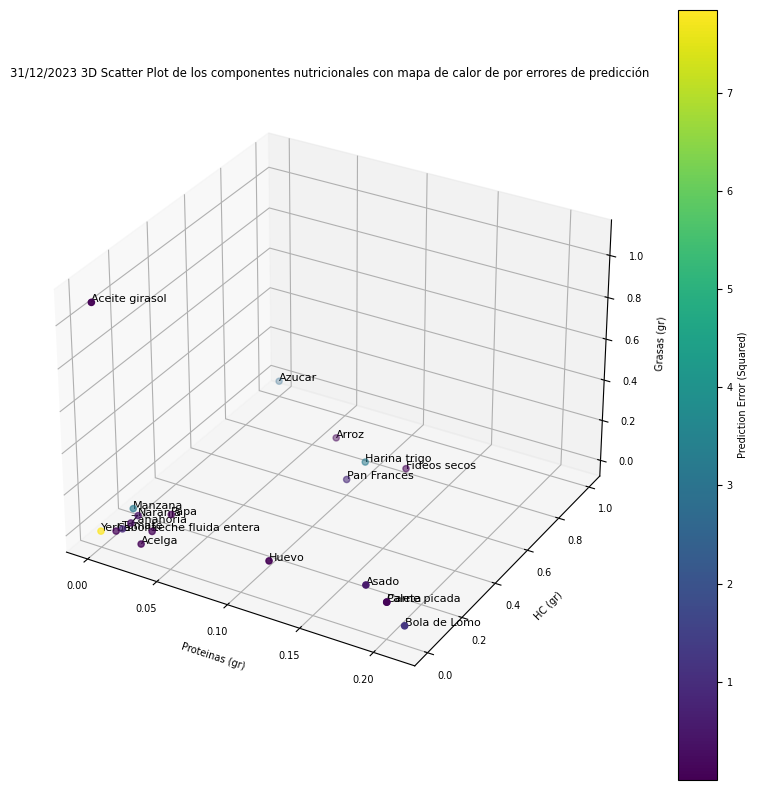

Error cuadrático 31/1/2024: 30.48348271964425


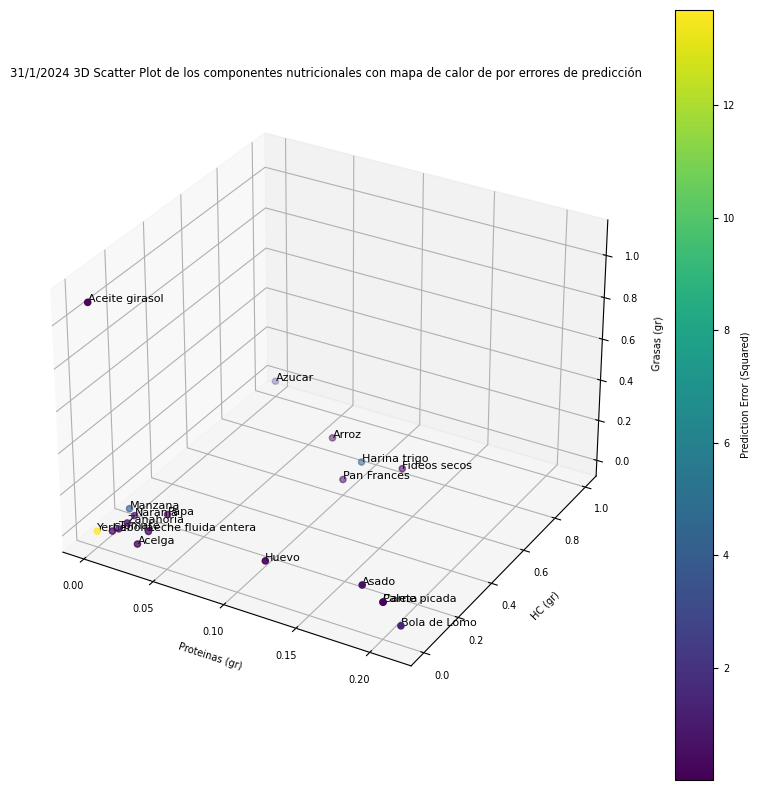

Error cuadrático 29/2/2024: 46.02229546100328


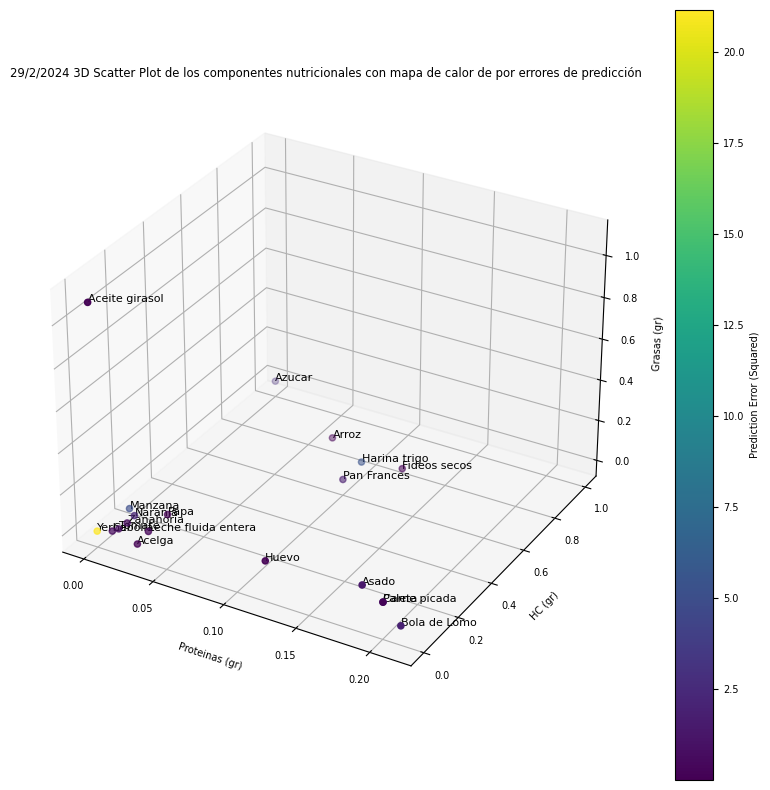

Error cuadrático 31/3/2024: 55.80922745630308


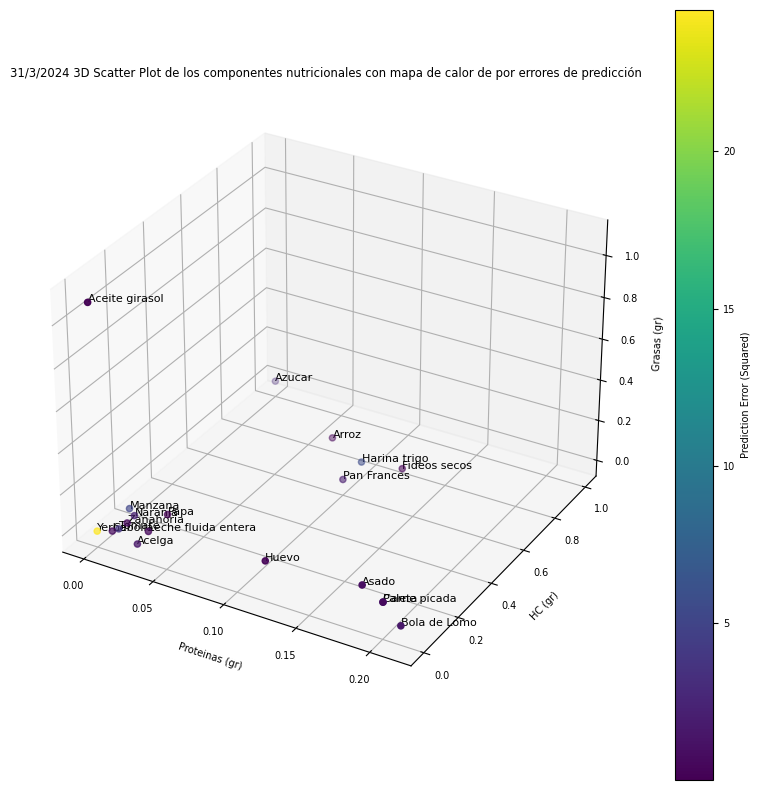

Error cuadrático 30/4/2024: 66.36842257850836


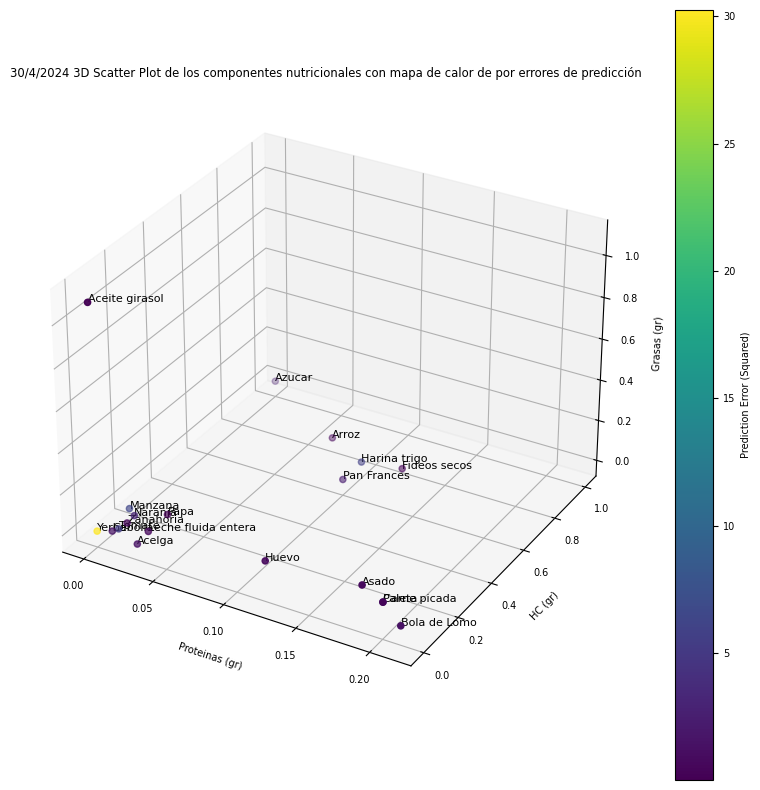

In [495]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

#X1 es el vector que es la columna HC (gr) de la tabla nutricional
X1 = tabla_nutricional_precios['Proteinas (gr)'].to_numpy()
X2 = tabla_nutricional_precios['HC (gr)'].to_numpy()
X3 = tabla_nutricional_precios['Grasas (gr)'].to_numpy()

alimentos = tabla_nutricional_precios['Alimento'].to_numpy()
fechas = ['31/12/2023', '31/1/2024', '29/2/2024', '31/3/2024', '30/4/2024']

#creamos la matriz A con los vectores X1, X2, X3
# f(x) = X1 * a + X2 * b + X3 * c
A = np.vstack([X1, X2, X3]).T
A_t = A.T
Ata = A_t @ A

#coeficientes obtenidos 
coeficientes = np.zeros((5, 3))

print(len(tabla_nutricional_precios))

for i, fecha in enumerate(fechas):
    #objetivo a aproximar
    Y = tabla_nutricional_precios[fecha].to_numpy()
    
    At_y = A_t @ Y

    #resolvemos el sistema de ecuaciones
    X = np.linalg.solve(Ata, At_y)
    #ahora podemos predecir los precios de los alimentos usando f(x) con x en R^3
    tabla_nutricional_precios[fecha+'_pred'] = X[0]*tabla_nutricional_precios['Proteinas (gr)'] + X[1]*tabla_nutricional_precios['HC (gr)'] + X[2]*tabla_nutricional_precios['Grasas (gr)']
    #calculamos el error cuadrático medio en cada fecha
    tabla_nutricional_precios[fecha+'_error'] = (tabla_nutricional_precios[fecha] - tabla_nutricional_precios[fecha+'_pred'])**2
    print(f'Error cuadrático {fecha}:', mean_squared_error(tabla_nutricional_precios[fecha], tabla_nutricional_precios[fecha+'_pred'])*len(tabla_nutricional_precios))

    coeficientes[i] = X

    # Plotting the 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with color map based on error
    sc = ax.scatter(X1, X2, X3, c=tabla_nutricional_precios[fecha+'_error'], cmap='viridis')

    # Adding color bar
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Prediction Error (Squared)')

    # Labeling the axes
    ax.set_xlabel('Proteinas (gr)')
    ax.set_ylabel('HC (gr)')
    ax.set_zlabel('Grasas (gr)')


    # Adding text labels for each point
    for i, alimento in enumerate(alimentos):
        ax.text(X1[i], X2[i], X3[i], alimento, size=8, zorder=1, color='k')

    plt.title(f'{fecha} 3D Scatter Plot de los componentes nutricionales con mapa de calor de por errores de predicción')
    plt.show()




Como comentario: La yerba es claramente la peor aproximación, eso es porque no tiene casi ningun nutriente, pero su precio no es tan bajo.

En este caso, en vez de conseguir una recta, estaríamos obteniendo un **hiperplano** de 3 dimensiones, contenido en un espacio de 4, por lo cual no es posible graficarlo. Procedemos a mostrar algunas proyecciones de los datos igualando dos dimesiones de datos a 0:

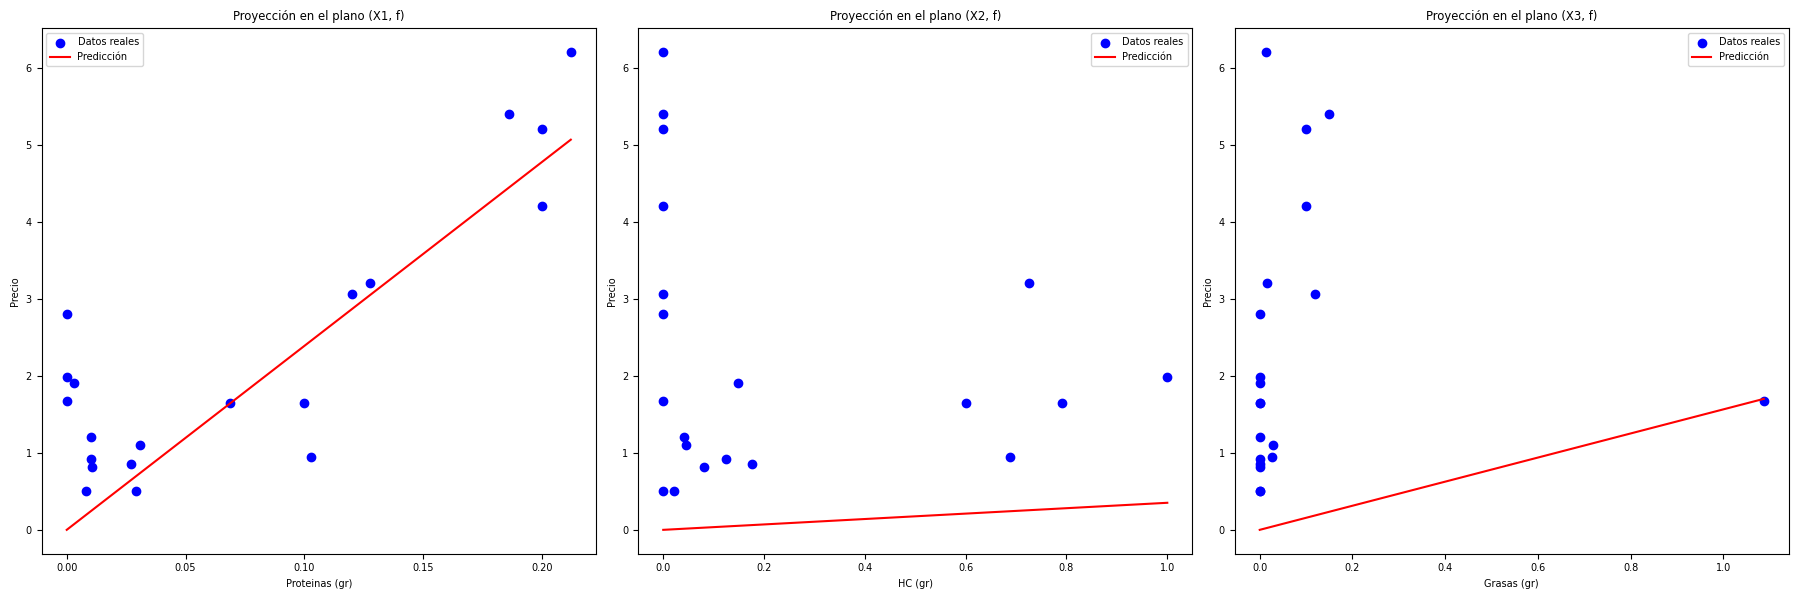

In [496]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

#X1 es el vector que es la columna HC (gr) de la tabla nutricional
X1 = tabla_nutricional_precios['Proteinas (gr)'].to_numpy()
X2 = tabla_nutricional_precios['HC (gr)'].to_numpy()
X3 = tabla_nutricional_precios['Grasas (gr)'].to_numpy()

alimentos = tabla_nutricional_precios['Alimento'].to_numpy()
fecha = '31/12/2023'

# Creamos la matriz A con los vectores X1, X2, X3
A = np.vstack([X1, X2, X3]).T
A_t = A.T
Ata = A_t @ A

# Objetivo a aproximar
Y = tabla_nutricional_precios[fecha].to_numpy()

At_y = A_t @ Y

# Resolvemos el sistema de ecuaciones
X = np.linalg.solve(Ata, At_y)

# Predecimos los precios de los alimentos usando f(x) con x en R^3
tabla_nutricional_precios[fecha+'_pred'] = X[0]*tabla_nutricional_precios['Proteinas (gr)'] + X[1]*tabla_nutricional_precios['HC (gr)'] + X[2]*tabla_nutricional_precios['Grasas (gr)']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Proyección en el plano (X1, f)
axes[0].scatter(X1, tabla_nutricional_precios[fecha], c='blue', label='Datos reales')
axes[0].set_xlabel('Proteinas (gr)')
axes[0].set_ylabel('Precio')
axes[0].set_title(f'Proyección en el plano (X1, f)')
# Línea de predicciones
x1_range = np.linspace(min(X1), max(X1), 100)
pred_line = X[0]*x1_range
axes[0].plot(x1_range, pred_line, color='red', label='Predicción')
axes[0].legend()

# Proyección en el plano (X2, f)
axes[1].scatter(X2, tabla_nutricional_precios[fecha], c='blue', label='Datos reales')
axes[1].set_xlabel('HC (gr)')
axes[1].set_ylabel('Precio')
axes[1].set_title(f'Proyección en el plano (X2, f)')
# Línea de predicciones
x2_range = np.linspace(min(X2), max(X2), 100)
pred_line = X[1]*x2_range
axes[1].plot(x2_range, pred_line, color='red', label='Predicción')
axes[1].legend()

# Proyección en el plano (X3, f)
axes[2].scatter(X3, tabla_nutricional_precios[fecha], c='blue', label='Datos reales')
axes[2].set_xlabel('Grasas (gr)')
axes[2].set_ylabel('Precio')
axes[2].set_title(f'Proyección en el plano (X3, f)')
# Línea de predicciones
x3_range = np.linspace(min(X3), max(X3), 100)
pred_line = X[2]*x3_range
axes[2].plot(x3_range, pred_line, color='red', label='Predicción')
axes[2].legend()

plt.tight_layout()
plt.show()


In [497]:
coeficientes

array([[23.88348911,  0.35122205,  1.56428951],
       [28.11405551,  0.5102003 ,  1.92252645],
       [32.36167916,  0.41443418,  2.14991046],
       [33.9908512 ,  0.45277625,  2.25197183],
       [35.12302315,  0.57814405,  2.33818276]])

Procedemos a generar nuestra tabla de aumentos para cada nutriente. Como calculamos cuadrados mínimos desde otro enfoque, aproximando el precio de los nutrientes **un mes a la vez**, las rectas las generamos a partir de nuestras aproximaciones. 

Sobre los coeficientes, que son los precios de los nutrientes, podemos calcular la tasa de cambio mes a mes, o total, que será el aumento porcentual.

In [498]:
import pandas as pd

# Nombres de los nutrientes
nutrientes = ['PROTEÍNA', 'HC', 'GRASAS']

# Armamos el DataFrame
columnas = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL']
df = pd.DataFrame(index=nutrientes, columns=columnas)

# Calcular el aumento porcentual para cada nutriente
for i in range(1, len(fechas)):
    aumento_porcentual = (coeficientes[i] - coeficientes[i - 1]) / coeficientes[i - 1] * 100
    df.iloc[:, i - 1] = aumento_porcentual

# Agregar la columna 'TOTAL' y calcularla
df['TOTAL'] = df.sum(axis=1)

df


/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91826/910377002.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i - 1] = aumento_porcentual


,ENERO,FEBRERO,MARZO,ABRIL,TOTAL
PROTEÍNA,17.713352,15.108541,5.034263,3.330814,41.186970
HC,45.264313,-18.770299,9.251668,27.688687,63.434368
GRASAS,22.900936,11.827354,4.747238,3.828242,43.303770


Finalmente, nuestro ajuste nos dice que el nutriente con mayor aumento durante estos 5 meses fueron los carbohidratos con un 63%. Mientras que la proteína y las grasas aumentaron parecido(41% y 43% respectivamente).

Notemos que en el ajuste anteriormente calculado también habíamos llegado a la misma conclusión, pero con valores menos precisos:

In [500]:
"""
#PEPO
#sumo todas las columnas de la tabla nutricional y me quedo con una fila
#tabla_nutricional_sum = tabla_nutricional_precios.sum(axis=0)*(1/19)
#print(tabla_nutricional_sum)

#ahora calculo el precio de cada nutriente por gramo
tabla_nutricional_precios['Proteina 31/12/2023'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['HC 31/12/2023'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['Grasas 31/12/2023'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/12/2023']/100
tabla_nutricional_precios['Proteina 31/1/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['HC 31/1/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['Grasas 31/1/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/1/2024']/100
tabla_nutricional_precios['Proteina 29/2/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['HC 29/2/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['Grasas 29/2/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['29/2/2024']/100
tabla_nutricional_precios['Proteina 31/3/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['HC 31/3/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['Grasas 31/3/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/3/2024']/100
tabla_nutricional_precios['Proteina 30/4/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['30/4/2024']/100
tabla_nutricional_precios['HC 30/4/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['30/4/2024']/100
tabla_nutricional_precios['Grasas 30/4/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['30/4/2024']/100
#ahora el aumento porcentual por cada nutriente
#tabla_nutricional_precios['Proteina %'] = (tabla_nutricional_precios['Proteina 30/4/2024'] - tabla_nutricional_precios['Proteina 31/12/2023'])/tabla_nutricional_precios['Proteina 30/4/2024']*100
#tabla_nutricional_precios['HC %'] = (tabla_nutricional_precios['HC 30/4/2024'] - tabla_nutricional_precios['HC 31/12/2023'])/tabla_nutricional_precios['HC 30/4/2024']*100
#tabla_nutricional_precios['Grasas %'] = (tabla_nutricional_precios['Grasas 30/4/2024'] - tabla_nutricional_precios['Grasas 31/12/2023'])/tabla_nutricional_precios['Grasas 30/4/2024']*100

#sacamos la columna cantidad
tabla_nutricional_precios = tabla_nutricional_precios.drop('Cantidad (gr/ml)', axis='columns')
#y las columnas de nutrientes (las que no tienen un '20' en el nombre)
alimentos = tabla_nutricional_precios['Alimento'] #guardo los alimentos
tabla_nutricional_precios = tabla_nutricional_precios.filter(regex='20')
tabla_nutricional_precios['Alimento'] = alimentos # agrego alimentos devuelta

#saco las primeras 5 columnas porque son el precio de los alimentos enteros en cada mes
tabla_nutricional_precios = tabla_nutricional_precios.drop(tabla_nutricional_precios.columns[0:5], axis=1)

print(tabla_nutricional_precios.shape)
tabla_nutricional_precios.head()
#calculo el promedio de cada columna
#tabla_nutricional_sum = tabla_nutricional_precios.sum(axis=0).mul(1/19)
#print(tabla_nutricional_sum)
"""

"\n#PEPO\n#sumo todas las columnas de la tabla nutricional y me quedo con una fila\n#tabla_nutricional_sum = tabla_nutricional_precios.sum(axis=0)*(1/19)\n#print(tabla_nutricional_sum)\n\n#ahora calculo el precio de cada nutriente por gramo\ntabla_nutricional_precios['Proteina 31/12/2023'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/12/2023']/100\ntabla_nutricional_precios['HC 31/12/2023'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/12/2023']/100\ntabla_nutricional_precios['Grasas 31/12/2023'] = tabla_nutricional_precios['Grasas (gr)']*tabla_nutricional_precios['31/12/2023']/100\ntabla_nutricional_precios['Proteina 31/1/2024'] = tabla_nutricional_precios['Proteinas (gr)']*tabla_nutricional_precios['31/1/2024']/100\ntabla_nutricional_precios['HC 31/1/2024'] = tabla_nutricional_precios['HC (gr)']*tabla_nutricional_precios['31/1/2024']/100\ntabla_nutricional_precios['Grasas 31/1/2024'] = tabla_nutricional_precios['Grasas (gr)']*tabl

In [501]:

#JOACO

# Calcular la cantidad de alimento necesaria para obtener 1 gramo de cada nutriente
tabla_nutricional_precios['Cantidad_Proteinas_1g'] = 1 / tabla_nutricional_precios['Proteinas (gr)']
tabla_nutricional_precios['Cantidad_HC_1g'] = 1 / tabla_nutricional_precios['HC (gr)']
tabla_nutricional_precios['Cantidad_Grasas_1g'] = 1 / tabla_nutricional_precios['Grasas (gr)']

# 1/prote
# fecha / (1/prote) = fecha * 1/(1/prote) = fecha * prote

# Fechas específicas para calcular el precio por gramo de cada nutriente
fechas = ['31/12/2023', '31/1/2024', '29/2/2024', '31/3/2024', '30/4/2024']

for fecha in fechas:
    # Calcular el precio por gramo de proteínas
    tabla_nutricional_precios[f'Proteinas {fecha}'] = tabla_nutricional_precios[fecha] / tabla_nutricional_precios['Cantidad_Proteinas_1g']
    # Calcular el precio por gramo de carbohidratos (HC)
    tabla_nutricional_precios[f'HC {fecha}'] = tabla_nutricional_precios[fecha] / tabla_nutricional_precios['Cantidad_HC_1g']
    # Calcular el precio por gramo de grasas
    tabla_nutricional_precios[f'Grasas {fecha}'] = tabla_nutricional_precios[fecha] / tabla_nutricional_precios['Cantidad_Grasas_1g']

#sacamos la columna cantidad
tabla_nutricional_precios = tabla_nutricional_precios.drop('Cantidad (gr/ml)', axis='columns')
#y las columnas de nutrientes (las que no tienen un '20' en el nombre)
alimentos = tabla_nutricional_precios['Alimento'] #guardo los alimentos
tabla_nutricional_precios = tabla_nutricional_precios.filter(regex='20')
tabla_nutricional_precios['Alimento'] = alimentos # agrego alimentos devuelta

#saco las primeras 5 columnas porque son el precio de los alimentos enteros en cada mes
tabla_nutricional_precios = tabla_nutricional_precios.drop(tabla_nutricional_precios.columns[0:5], axis=1)

print(tabla_nutricional_precios.shape)
tabla_nutricional_precios.head()


(20, 26)


,31/12/2023_pred,31/12/2023_error,31/1/2024_pred,31/1/2024_error,29/2/2024_pred,29/2/2024_error,31/3/2024_pred,31/3/2024_error,30/4/2024_pred,30/4/2024_error,...,Proteinas 29/2/2024,HC 29/2/2024,Grasas 29/2/2024,Proteinas 31/3/2024,HC 31/3/2024,Grasas 31/3/2024,Proteinas 30/4/2024,HC 30/4/2024,Grasas 30/4/2024,Alimento
0,0.801909,0.088858,0.950758,0.067206,1.084623,0.286628,1.139851,0.562723,1.183216,0.650901,...,0.05022,0.07452,0.046980,0.058590,0.08694,0.054810,0.061690,0.09154,0.057710,Leche fluida entera
6,3.050800,0.000023,3.600785,0.000107,4.137360,0.000859,4.344916,0.142360,4.490961,0.619081,...,0.50000,0.00000,0.492187,0.566667,0.00000,0.557812,0.633333,0.00000,0.623437,Huevo
7,4.676972,0.522769,5.517593,0.612160,6.341759,1.341522,6.660094,0.883423,6.883610,0.750632,...,1.39500,0.00000,1.125000,1.413600,0.00000,1.140000,1.441500,0.00000,1.162500,Asado
8,4.933127,0.071221,5.815064,0.148176,6.687327,0.170299,7.023367,0.603158,7.258423,0.411621,...,1.42000,0.00000,0.710000,1.560000,0.00000,0.780000,1.580000,0.00000,0.790000,Paleta
10,4.933127,0.537475,5.815064,1.030354,6.687327,2.212141,7.023367,3.324669,7.258423,3.092051,...,1.04000,0.00000,0.520000,1.040000,0.00000,0.520000,1.100000,0.00000,0.550000,Carne picada


In [502]:
#tomamos las columnas para cada nutriente

#filtro las columnas que tienen 'proteina' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_proteina = tabla_nutricional_precios.filter(regex='Proteina')
tabla_nutricional_proteina['Alimento'] = alimentos # agrego alimentos devuelta
#filtro las columnas que tienen 'hc' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_hc = tabla_nutricional_precios.filter(regex='HC')
tabla_nutricional_hc['Alimento'] = alimentos # agrego alimentos devuelta
#filtro las columnas que tienen 'grasas' en el nombre y la de alimentos, y creo una nueva tabla
tabla_nutricional_grasas = tabla_nutricional_precios.filter(regex='Grasas')
tabla_nutricional_grasas['Alimento'] = alimentos # agrego alimentos devuelta

# transformamos el DataFrame y agregmos la columna 'Mes' para poder graficar
df_proteina = tabla_nutricional_proteina.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_proteina['Mes'] = df_proteina['Mes'].str.replace(f'Proteinas ', '')  # Limpiar los nombres de los meses
df_proteina['Mes'] = df_proteina['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_proteina.dropna(inplace=True)  # Eliminar filas con valores nulos
#lo mismo para HC
df_hc = tabla_nutricional_hc.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_hc['Mes'] = df_hc['Mes'].str.replace(f'HC ', '')  # Limpiar los nombres de los meses
df_hc['Mes'] = df_hc['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_hc.dropna(inplace=True)  # Eliminar filas con valores nulos
#lo mismo para grasas
df_grasas = tabla_nutricional_grasas.melt(id_vars=['Alimento'], var_name='Mes', value_name='Valor')
df_grasas['Mes'] = df_grasas['Mes'].str.replace(f'Grasas ', '')  # Limpiar los nombres de los meses
df_grasas['Mes'] = df_grasas['Mes'].astype(str)  # Asegurar que 'Mes' sea una cadena
df_grasas.dropna(inplace=True)  # Eliminar filas con valores nulos

df_proteina.head()

/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91826/3773505652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_nutricional_proteina['Alimento'] = alimentos # agrego alimentos devuelta
/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91826/3773505652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_nutricional_hc['Alimento'] = alimentos # agrego alimentos devuelta
/var/folders/rp/twr9spd52_j3wb4h1gdvq9lr0000gn/T/ipykernel_91826/3773505652.py:11: SettingWithCopyWarnin

,Alimento,Mes,Valor
0,Leche fluida entera,31/12/2023,0.034100
1,Huevo,31/12/2023,0.366667
2,Asado,31/12/2023,1.004400
3,Paleta,31/12/2023,1.040000
4,Carne picada,31/12/2023,0.840000


Coeficientes: x0 = 0.2530586121120208, x1 = 0.03263963472818512



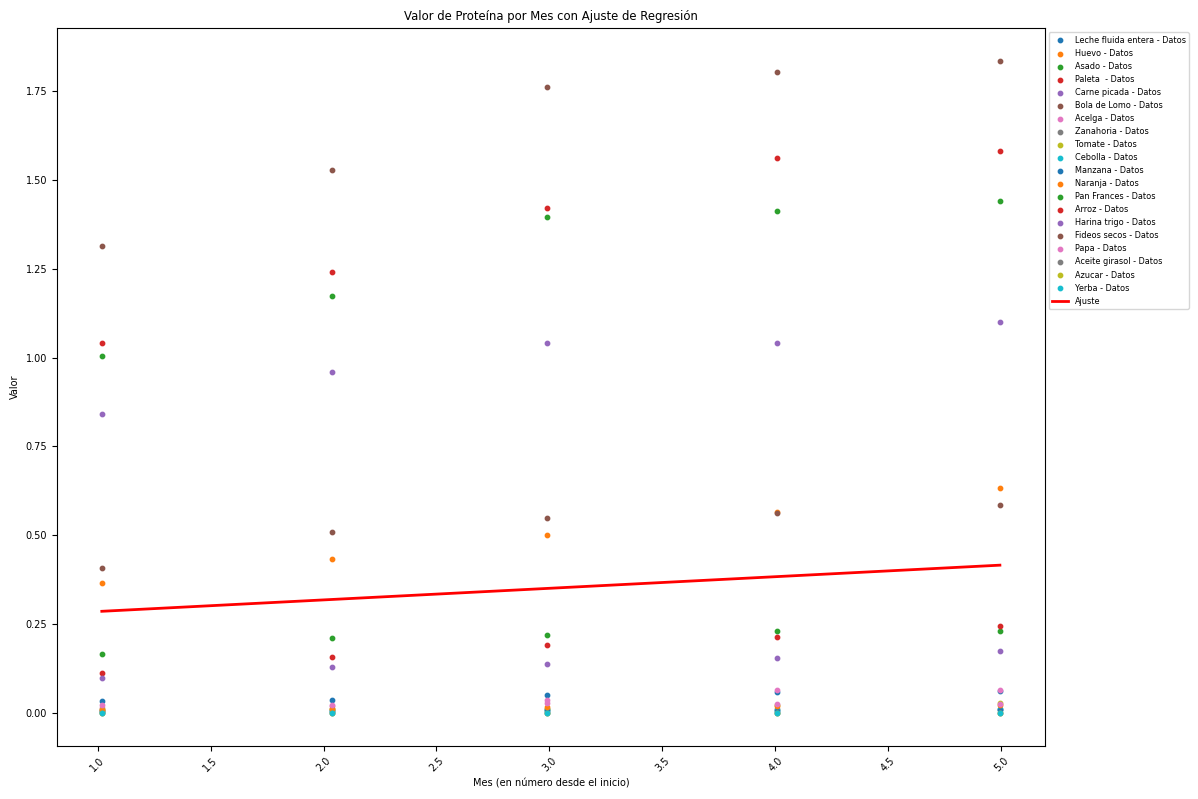

Coeficientes: x0 = 0.3718975061383654, x1 = 0.047476956382883746



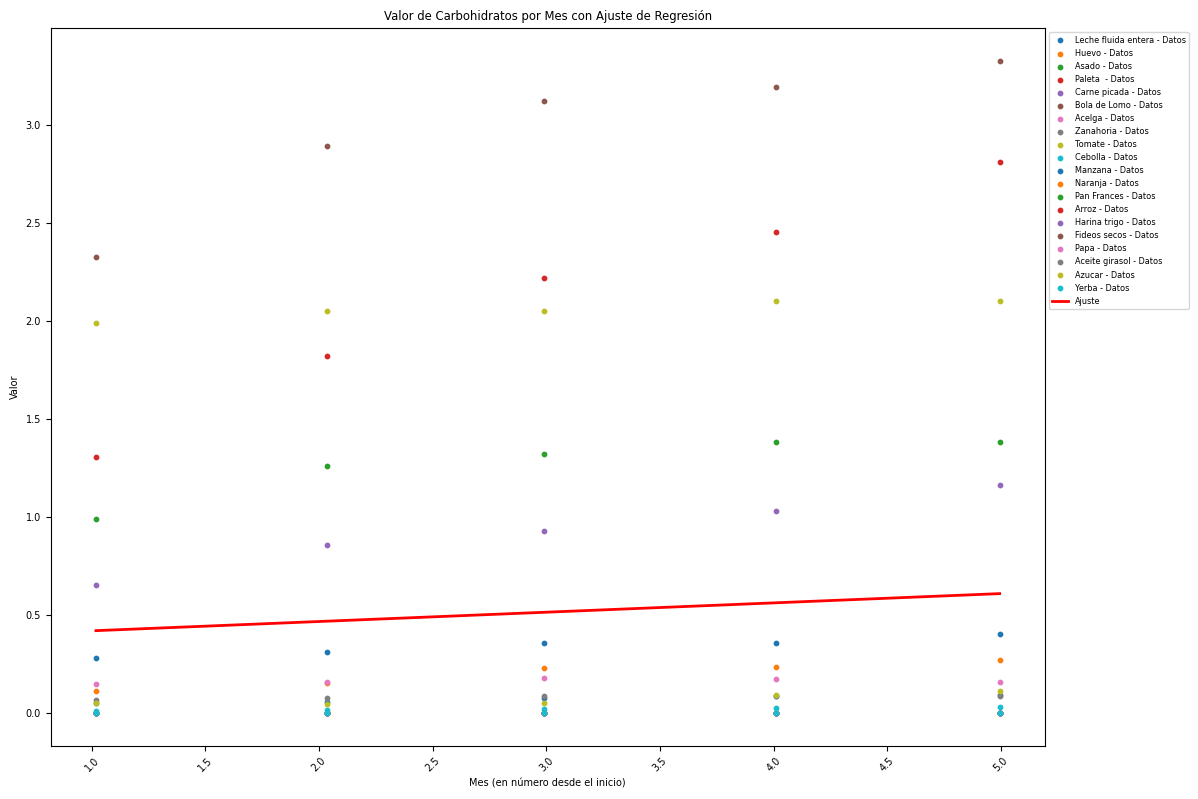

Coeficientes: x0 = 0.1923090510397278, x1 = 0.024748450568319855



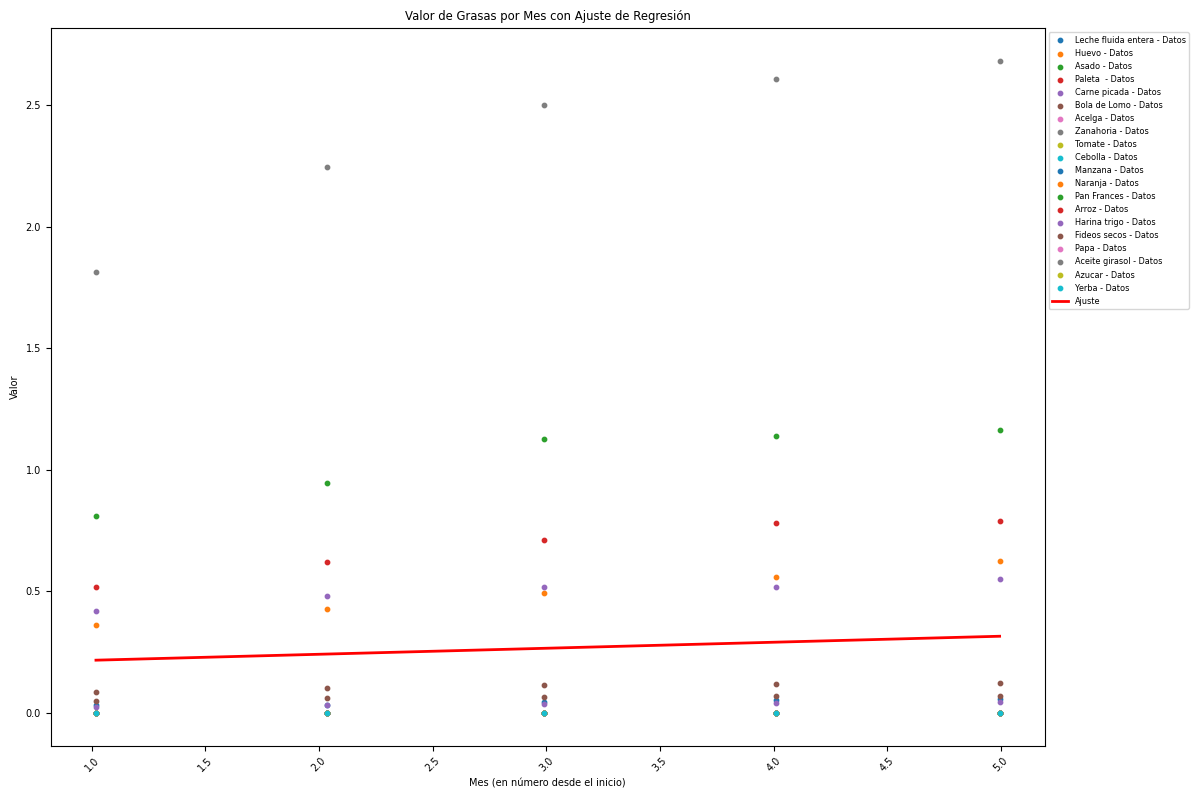

In [503]:
#para aplicarle cuadrados minimos, tuvimos problemas al querer tomar las columnas de los meses, 
# por eso decidimos pasarlas a un formato en el cual nos deje resolver la consigna...

# convertimos las fechas en 'Mes' a un formato de datetime
df_proteina['Mes'] = pd.to_datetime(df_proteina['Mes'], format='%d/%m/%Y')
df_hc['Mes'] = pd.to_datetime(df_hc['Mes'], format='%d/%m/%Y')
df_grasas['Mes'] = pd.to_datetime(df_grasas['Mes'], format='%d/%m/%Y')

# definimos una fecha de inicio para calcular los meses desde esa fecha para que 31/12/2023 sea el mes 1.
fecha_inicio = pd.to_datetime('30/11/2023', format='%d/%m/%Y')

# calculamos el número de meses desde la fecha de inicio
df_proteina['Mes_Num'] = (df_proteina['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')
df_hc['Mes_Num'] = (df_hc['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')
df_grasas['Mes_Num'] = (df_grasas['Mes'] - fecha_inicio) / np.timedelta64(1, 'M')

# funcion que ajusta y grafica la regresión lineal usando mínimos cuadrados
def plot_nutrient_with_regression_manual(data, title):
    plt.figure(figsize=(12, 8))
    
    # ajustamos el modelo para el precio e funcion del tiempo con el nombre de las columnas 
    X = data['Mes_Num'].values
    y = data['Valor'].values
    
    # armamos la matriz A
    A = np.vstack([np.ones(len(X)), X]).T
    
    # buscamos x usando la fórmula de mínimos cuadrados vista en clase: A^tAx = A^ty
    A_t = A.T
    A_t_A = np.dot(A_t, A)
    A_t_y = np.dot(A_t, y)
    x = np.linalg.solve(A_t_A, A_t_y)

    # Coeficientes obtenidos
    x0, x1 = x
    print(f'Coeficientes: x0 = {x0}, x1 = {x1}')
    print()
    
    # predecimos los valores ajustados
    y_pred = x0 + x1 * X 

    # graficamos los puntos y la línea ajustada
    for alimento in data['Alimento'].unique():
        subset = data[data['Alimento'] == alimento]
        plt.scatter(subset['Mes_Num'], subset['Valor'], label=f'{alimento} - Datos', s=10)  
    
    plt.plot(data['Mes_Num'], y_pred, label=f'Ajuste', color='red', linewidth=2)  
    plt.xlabel('Mes (en número desde el inicio)')
    plt.ylabel('Valor')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# generamos un grafico para cada nutriente
plot_nutrient_with_regression_manual(df_proteina, 'Valor de Proteína por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_manual(df_hc, 'Valor de Carbohidratos por Mes con Ajuste de Regresión')
plot_nutrient_with_regression_manual(df_grasas, 'Valor de Grasas por Mes con Ajuste de Regresión')


La pendiente representa el cambio en el precio del nutriente por mes. 
Si es positiva, el precio está aumentando; si es negativa, el precio está disminuyendo. En este caso, aunque la pediente sea chica y positiva, nos muestra una tendencia de crecimiento en el precio de los 3 nutrientes.

Un coeficiente mayor indica un aumento más rápido en el precio del nutriente. Los 3 nutrientes tuvireon un aumento relativamente similar, siendo los carbohidratos los que aumentaron "más rapidos".

# Consigna 6

Comparar el aumento de la carne en comparación con los otros rubros. Evaluar cómo queda la ingesta individual en relación con la tabla de metas de la OMS si la gente consume ese porcentaje menos de carne.


Utilizamos cuadrados mínimos para calcular el aumento total. Para cada rubro, consideramos los precios de cada alimento en el primer mes como nuestra variable independiente, con un coeficiente a encontrar.

$f(x) = ax$

Nuestro objetivo es aproximar el precio del último mes con el primero, para así encontrar el aumento porcentual.

In [532]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

#vuelvo a pasar los alimentos a munisculas
consumidores_libres['PRODUCTOS'] = consumidores_libres['PRODUCTOS'].str.lower()

# defino los rubros de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'almacen': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol','arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco','leche c/vit.fort'],
}

# filtro los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

aumentos_totales_por_rubro = []

for rubro in grupos_alimentos.keys():

    #filtramos los productos del rubro
    productos = consumidores_filtrado[consumidores_filtrado['PRODUCTOS'].isin(grupos_alimentos[rubro])]

    #A es el precio de la columna 31/12/2023
    A = productos['31/12/2023'].to_numpy().T
    #Y es el precio de la columna 30/4/2024
    Y = productos['30/4/2024'].to_numpy()

    AtA = A.T @ A
    AtY = A.T @ Y

    #en vez de resolver el sistema de ecuaciones, como tenemos números reales en vez de matriz, pasamos dividiendo:
    #x = np.linalg.solve(AtA, AtY)
    x = AtY / AtA

    print(x)

    #predecimos el precio del ultimo mes
    Y_pred = A * x
    #calculamos el error
    error = mean_squared_error(Y, Y_pred)

    print(f"El error medio calculado para {rubro} es ", error)

    aumentos_totales_por_rubro.append(x)


print(aumentos_totales_por_rubro)

1.910592565169102
El error medio calculado para frutas_verduras es  545735.9444075436
1.421980762379765
El error medio calculado para carne es  127887.86961168531
1.6450756795404695
El error medio calculado para almacen es  379465.6223280563
[1.910592565169102, 1.421980762379765, 1.6450756795404695]


Utilizando este método, obtenemos los aumentos para los siguientes rubros:

- CARNE: 42,19%
- FRUTAS Y VERDURAS: 64,5%
- ALMACÉN: 91,05%

También calculamos el error cuadrático total para compararlo con los otros métodos.

En el siguiente método, aproximamos los datos usando el més como dato de entrada, y así obtener un promedio de aumento para cada rubro.

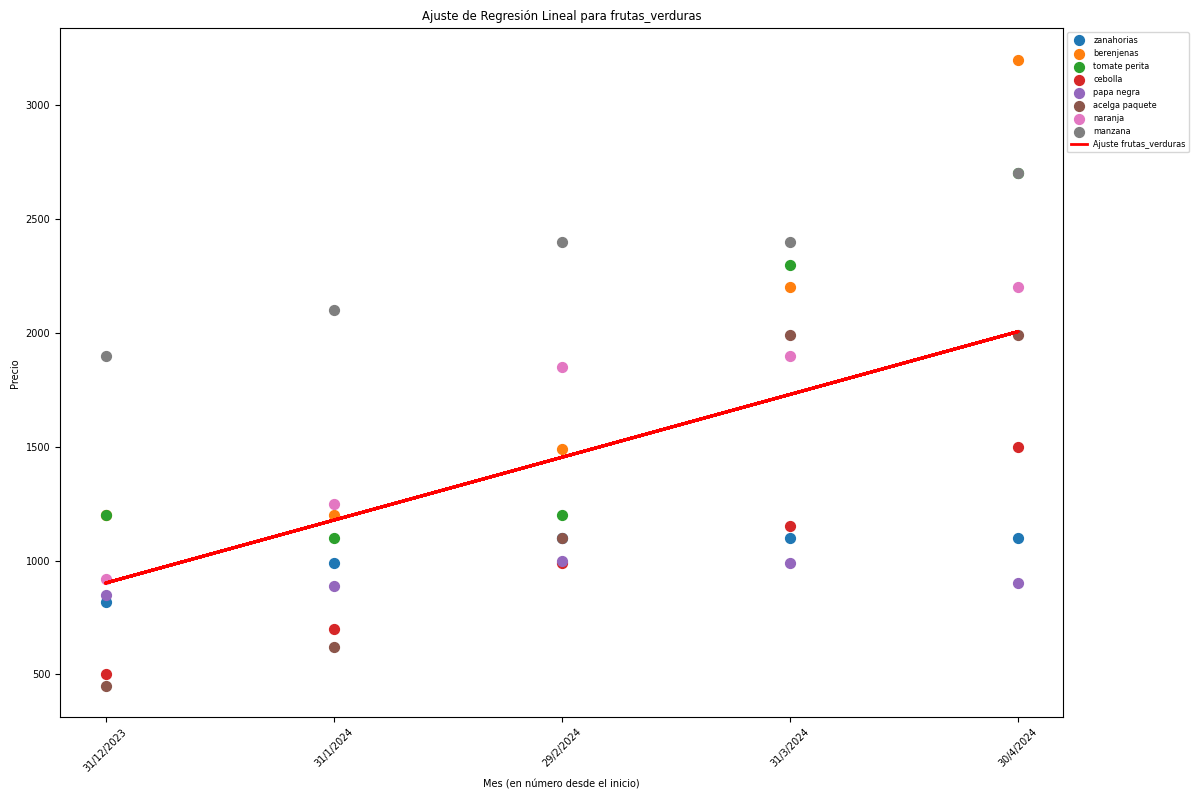

Aumento promedio para frutas_verduras: 122.46%

Coeficientes para frutas_verduras: x0 = 901.5, x1 = 276.0
Error calculado medio para el rubro frutas_verduras 107632201793.83803


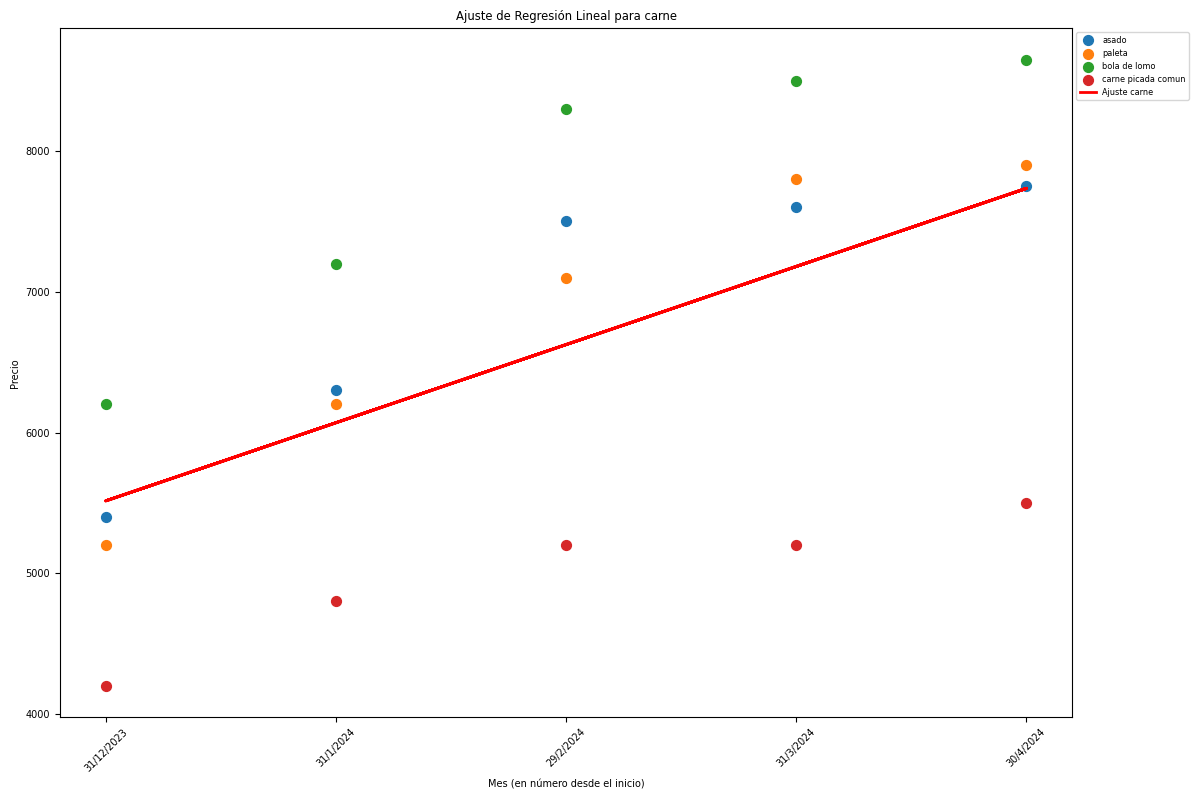

Aumento promedio para carne: 40.25%

Coeficientes para carne: x0 = 5515.0, x1 = 555.0
Error calculado medio para el rubro carne 11048636133.365894


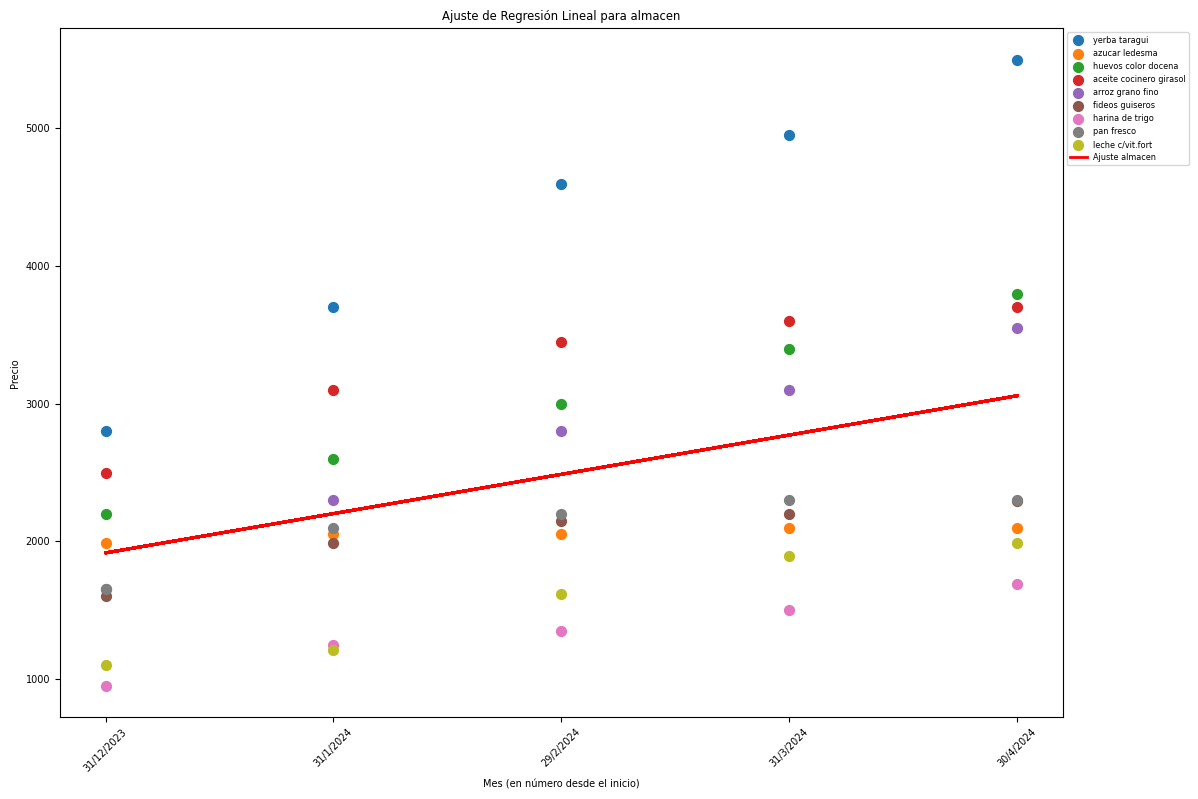

Aumento promedio para almacen: 59.61%

Coeficientes para almacen: x0 = 1916.0, x1 = 285.55555555555554
Error calculado medio para el rubro almacen 24844662479.38387


In [534]:
consumidores_libres = pd.read_csv('consumidores_libres.csv', sep=';')

#vuelvo a pasar los alimentos a munisculas
consumidores_libres['PRODUCTOS'] = consumidores_libres['PRODUCTOS'].str.lower()

# defino los rubros de alimentos
grupos_alimentos = {
    'frutas_verduras': ['zanahorias', 'berenjenas', 'tomate perita', 'cebolla', 'papa negra', 'acelga paquete', 'naranja', 'manzana'],
    'carne': ['asado', 'paleta', 'bola de lomo', 'carne picada comun'],
    'almacen': ['yerba taragui', 'azucar ledesma', 'huevos color docena', 'aceite cocinero girasol','arroz grano fino', 'fideos guiseros', 'harina de trigo', 'pan fresco','leche c/vit.fort'],
}

# filtro los datos de consumidores_libres para incluir solo los alimentos de los grupos específicos
consumidores_filtrado = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]

# agarramos las últimas 5 columnas del archivo...los meses a evaluar
fechas = consumidores_filtrado.columns[-5:]

# convertimos las fechas a formato datetime
fechas_dt = pd.to_datetime(fechas, format='%d/%m/%Y')

# creamos una columna numérica para los meses desde una fecha de inicio
fecha_inicio = fechas_dt[0]

# creamos una columna para el número de meses desde la fecha de inicio
for i, fecha in enumerate(fechas):
    consumidores_filtrado[f'{fecha}_Num'] = i

# creamos el diccionario para guardar los aumentos promedio
aumentos_promedio = {}

# usamos una funcion "similar" a la del pto 5, adaptada para ajustar y graficar la regresión lineal para cada rubro
def plot_rubro_with_regression_manual(data, fechas, rubro, title):
    plt.figure(figsize=(12, 8))
    
    X = []
    y = []
    alimentos = []
    
    for producto in grupos_alimentos[rubro]:
        for i, fecha in enumerate(fechas):
            X.append(i)
            y.append(data.loc[data['PRODUCTOS'] == producto, fecha].values[0])
            alimentos.append(producto)
    
    X = np.array(X)
    y = np.array(y)

    # Matriz A para mínimos cuadrados
    A = np.vstack([np.ones(len(X)), X]).T
    
    # Resolver usando la fórmula de mínimos cuadrados
    A_t = A.T
    A_t_A = np.dot(A_t, A)
    A_t_y = np.dot(A_t, y)
    x = np.linalg.solve(A_t_A, A_t_y)

    # Coeficientes obtenidos
    x0, x1 = x
    # Predecir los valores ajustados
    y_pred = x0 + x1 * X

    # Graficar los puntos y la línea ajustada
    for producto in grupos_alimentos[rubro]:
        subset = data[data['PRODUCTOS'] == producto]
        plt.scatter(range(len(fechas)), subset[fechas].values.flatten(), label=f'{producto}', s=50)  
    
    plt.plot(X, y_pred, label=f'Ajuste {rubro}', color='red', linewidth=2)
    plt.xlabel('Mes (en número desde el inicio)')
    plt.ylabel('Precio')
    plt.title(title)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.xticks(range(len(fechas)), fechas, rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Calcular el aumento promedio de precios
    aumento_promedio = (y_pred[-1] - y_pred[0]) / y_pred[0] * 100
    print(f'Aumento promedio para {rubro}: {aumento_promedio:.2f}%\n')
    print(f'Coeficientes para {rubro}: x0 = {x0}, x1 = {x1}')
    
    #calculamos las predicciones segun los aumentos calculados

    consumidores_filtrado['precio final calculado'] = consumidores_filtrado['31/12/2023']*aumento_promedio
    print(f"Error calculado medio para el rubro {rubro}", mean_squared_error(consumidores_filtrado['precio final calculado'], consumidores_filtrado['30/4/2024']))
    
# Aplicar y graficar para cada rubro
for rubro in grupos_alimentos.keys():
    plot_rubro_with_regression_manual(consumidores_filtrado, fechas, rubro, f'Ajuste de Regresión Lineal para {rubro}')

Con este método obtuvimos aumentos similares pero mucho menos precisos en cuanto al error cuadrático:

- CARNE: 122,46%
- FRUTAS Y VERDURAS: 40,25%
- ALMACÉN: 59,61%

In [506]:
aumentos_promedio_directo = {}

for rubro, productos in grupos_alimentos.items():
    precios_iniciales = []
    precios_finales = []
    for producto in productos:
        precios_iniciales.append(consumidores_filtrado.loc[consumidores_filtrado['PRODUCTOS'] == producto, fechas[0]].values[0])
        precios_finales.append(consumidores_filtrado.loc[consumidores_filtrado['PRODUCTOS'] == producto, fechas[-1]].values[0])
    promedio_inicial = np.mean(precios_iniciales)
    promedio_final = np.mean(precios_finales)
    aumento_promedio = (promedio_final - promedio_inicial) / promedio_inicial * 100
    aumentos_promedio_directo[rubro] = aumento_promedio

aumentos_promedio_directo


{'frutas_verduras': 107.78061224489797,
 'carne': 41.904761904761905,
 'almacen': 63.74695863746959}

Por último, para este método calculando el promedio sin usar cuadrados mínimos también obtuvimos aumentos similares.

Según los diferentes ajustes, claramente el rubro que más aumentó fue el de las frutas y verduras, que casi duplicó el aumento de los otros dos rubros.

In [508]:
# decidimos llamar "carne" a las carnes blancas y rojas, dejando de lado el huevo y la mortadela
alimentos_que_consideramos_carne = ['Asado', 'Paleta cocida', 'pescado', 'pollo', 'Higado', 'Bola de Lomo', 'Carne picada', 'Hueso c/carne', 'Paleta ']

columnas_numericas = ['Cantidad (gr/ml)', 'HC (gr)', 'Proteinas (gr)', 'Grasas (gr)',
                      'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)',
                      'Fibra (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)']

#creamos una copy para no modificar al original
tabla_nutricional_carne58 = tabla_nutricional_clean.copy()

#le calculamos a todos los valores el 42%
# Aplicar el factor 0.58 a las filas que contienen los alimentos especificados
tabla_nutricional_carne58.loc[tabla_nutricional_carne58['Alimento'].isin(alimentos_que_consideramos_carne), columnas_numericas] *= 0.58

# Mostrar las primeras filas del DataFrame resultante
tabla_nutricional_carne58.head(10)

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
0,Leche fluida entera,270.00,12.42,8.370,7.83,0.0,4.9900,2.1900,0.52000,0.0,0.153900,0.283500,0.000189
1,Leche entera en polvo,11.00,4.51,2.840,2.73,0.0,1.6200,0.7700,0.06000,0.0,0.044440,0.099000,0.000060
2,Yogurt,19.00,2.45,0.510,0.49,0.0,0.3200,0.1400,0.01400,0.0,0.007990,0.017670,0.000005
3,Queso crema,1.66,0.06,0.100,0.37,0.0,0.3600,0.1100,0.01000,0.0,0.001230,0.000930,0.000000
4,Queso cuartirolo,3.66,0.06,0.770,0.80,0.0,0.7600,0.2100,0.02000,0.0,0.020840,0.016540,0.000000
5,Queso rallar,1.66,0.06,0.550,0.45,0.0,0.3600,0.1100,0.00800,0.0,0.020420,0.015780,0.000000
6,Huevo,16.00,0.00,1.920,1.89,0.0,0.5100,0.7200,0.46000,0.0,0.021600,0.008960,0.000400
7,Asado,29.00,0.00,5.394,4.35,0.0,1.6994,1.8966,0.10962,0.0,0.019140,0.004350,0.000650
8,Paleta,8.70,0.00,1.740,0.87,0.0,0.5104,0.5684,0.03248,0.0,0.005742,0.001044,0.000197
9,Hueso c/carne,8.70,0.00,1.740,0.87,0.0,0.5104,0.5684,0.03248,0.0,0.005742,0.001044,0.000197


In [509]:
tabla_nutricional_carne58.sum(numeric_only=True)#sumamos todos los valores numericos de tabla_nutricional

Cantidad (gr/ml)        1800.750000
HC (gr)                  409.970400
Proteinas (gr)            93.450000
Grasas (gr)               69.733200
Azucares Libres (gr)      56.750000
AGS (gr)                  21.772000
AGNI (gr)                 22.372140
AG p (gr)                 27.161740
Fibra (gr)                21.260000
Na (gr)                    3.269283
Ca (gr)                    0.707044
Fe (gr)                    0.021190
dtype: float64

In [510]:
# con la suma de los datos de tabla_nutricional_58 chequeamos a ver si los valores cumplen con lo propuesto por la OMS
oms_check(tabla_nutricional_carne58)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de nutrientes (g): 655.1611179999999
---
Proteinas 14.26366697176312
Cantidad (g): 93.44999999999999
Resultado: True
---
HC 62.57550833472997
Cantidad (g): 409.9704
Resultado: True
---
Grasas 10.64367192804015
Cantidad (g): 69.7332
Resultado: False
---
Sodio 3.2692834
Cantidad (g): 3.2692834
Resultado: False
---
Fibra 21.26
Cantidad (g): 21.26
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

### Comparación con Metas de la OMS

Al comparar los valores obtenidos con las metas de la OMS, se observa que el único nutriente que queda por debajo de la recomendación de la OMS es la fibra, mientras que el sodio queda por encima de la recomendación. Al mismo tiempo, se observa una mejora en comparación con los resultados del chequeo previamente realizado en el punto 2. Al reducir la ingesta de carne, se logró que los valores de la proteína cumplan con los establecidos por la OMS.


### Conclusión

Si la gente consume un 42% menos de carne debido al aumento del precio, la dieta de un argentino promedio estaría más cerca de cumplir con los valores recomendados por la OMS. Sin embargo, no estaría de más bajar el consumo de sodio en el día a día y buscar alimentos para ayudar a "levantar" los porcentajes en la ingesta de fibras, por ejemplo: frutas, verduras, legumbres y cereales integrales.


### Extra

Grafico que muestra el aumento individual de cada alimento desde el primer mes hasta el ultimo:

In [511]:
# filtramos los datos de consumidores_libres para incluir solo los alimentos
consumidores_filtrado = consumidores_libres[consumidores_libres['PRODUCTOS'].isin(sum(grupos_alimentos.values(), []))]
# armamos un nuevo dataframe
consumidores_con_aumentos = pd.DataFrame(consumidores_filtrado)
# calculamos el porcentaje de aumento
consumidores_con_aumentos["Aumento (%)"] = ((consumidores_libres["30/4/2024"] - consumidores_libres["31/12/2023"]) / consumidores_libres["31/12/2023"]) * 100
print("Aumentos por producto")
consumidores_con_aumentos


Aumentos por producto


,PRODUCTOS,Cantidad,31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024,Aumento (%)
0,aceite cocinero girasol,1500,2500.0,3100.0,3450.0,3600.0,3700.0,48.000000
1,arroz grano fino,1000,1650.0,2300.0,2800.0,3100.0,3550.0,115.151515
2,azucar ledesma,1000,1990.0,2050.0,2050.0,2100.0,2100.0,5.527638
3,fideos guiseros,500,1600.0,1990.0,2150.0,2200.0,2290.0,43.125000
4,harina de trigo,1000,950.0,1250.0,1350.0,1500.0,1690.0,77.894737
5,huevos color docena,720,2200.0,2600.0,3000.0,3400.0,3800.0,72.727273
6,pan fresco,1000,1650.0,2100.0,2200.0,2300.0,2300.0,39.393939
7,leche c/vit.fort,1000,1100.0,1210.0,1620.0,1890.0,1990.0,80.909091
8,yerba taragui,1000,2800.0,3700.0,4600.0,4950.0,5500.0,96.428571
9,zanahorias,1000,820.0,990.0,1100.0,1100.0,1100.0,34.146341


# Consigna 7

Proponer dos alimentos de la tabla 3 que puedan reemplazar la disminución del 18.5% en el consumo de carne sin perder valor nutricional. Corroborar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se impone como restricción en la elección que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento del precio de la carne.


### Vemos los nutrientes de la carne

In [512]:

carnes = ['Asado', 'Bola de Lomo', 'Paleta ', 'Carne picada'] #agrupo las 4 carnes
carnes_data = tabla_nutricional_clean[tabla_nutricional_clean['Alimento'].isin(carnes)] #filtro en el dataset para buscar esas 4 filas

total_nutrientes = carnes_data.sum(numeric_only=True) #sumo las cantidades y los nutrientes
print(total_nutrientes)


Cantidad (gr/ml)        126.00000
HC (gr)                   0.00000
Proteinas (gr)           24.91000
Grasas (gr)              12.18000
Azucares Libres (gr)      0.00000
AGS (gr)                  7.38000
AGNI (gr)                 8.22000
AG p (gr)                 0.47500
Fibra (gr)                0.00000
Na (gr)                   0.08214
Ca (gr)                   0.01356
Fe (gr)                   0.00324
dtype: float64


Calculamos las nutrientes de ese 18.5% usando código del punto 6. Ese es nuestro objetivo de reemplazo.

In [513]:
#total_nutrientes son los valores nutricionales de las carnes
nutrientes_carne185 = total_nutrientes * 0.185
nutrientes_carne185

Cantidad (gr/ml)        23.310000
HC (gr)                  0.000000
Proteinas (gr)           4.608350
Grasas (gr)              2.253300
Azucares Libres (gr)     0.000000
AGS (gr)                 1.365300
AGNI (gr)                1.520700
AG p (gr)                0.087875
Fibra (gr)               0.000000
Na (gr)                  0.015196
Ca (gr)                  0.002509
Fe (gr)                  0.000599
dtype: float64

## Explicación

Entendemos que la restricción del precio de los alimentos de reemplazo debe ser menor al 50% del aumento de la carne se refiere a la diferencia en dinero entre lo que costaba comprar los 4 alimentos de carne en el primer mes y en el último mes. Los alimentos que propongamos no deben superar en precio la mitad de esa diferencia.

Para hacer ese análisis de precios, tenemos en cuenta nuestra tabla de la canasta básica (sólo con los alimentos que también están en la tabla de consumidores finales, es decir, tienen precios), con las cantidades de consumo diario dadas. Los precios (dados en otras cantidades) son ajustados a las cantidades de la CBA de manera equivalente.

In [514]:


#tabla_nutricional_aumentos es la tabla nutricional con los precios de los alimentos, primero normalizada (todo a 1g)
tabla_nutricional_aumentos.head()


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,1.0,0.046,0.031,0.029000,0.0,0.018481,0.008111,0.001926,0.0,0.00057,0.00105,7.000000e-07,1.100000,1.210000,1.620000,1.890000,1.990000
6,Huevo,1.0,0.000,0.120,0.118125,0.0,0.031875,0.045000,0.028750,0.0,0.00135,0.00056,2.500000e-05,3.055556,3.611111,4.166667,4.722222,5.277778
7,Asado,1.0,0.000,0.186,0.150000,0.0,0.058600,0.065400,0.003780,0.0,0.00066,0.00015,2.240000e-05,5.400000,6.300000,7.500000,7.600000,7.750000
8,Paleta,1.0,0.000,0.200,0.100000,0.0,0.058667,0.065333,0.003733,0.0,0.00066,0.00012,2.266667e-05,5.200000,6.200000,7.100000,7.800000,7.900000
10,Carne picada,1.0,0.000,0.200,0.100000,0.0,0.058519,0.065556,0.003704,0.0,0.00066,0.00012,2.222222e-05,4.200000,4.800000,5.200000,5.200000,5.500000


In [515]:
# alimentos_cantidades es la tabla nutricional sólo con las cantidades de los alimentos
alimentos_cantidades.head()

,Alimento,Cantidad (gr/ml)
0,Leche fluida entera,270.00
1,Leche entera en polvo,11.00
2,Yogurt,19.00
3,Queso crema,1.66
4,Queso cuartirolo,3.66


En la siguiente celda tomamos la tabla normalizada y la multiplicamos por las cantidades correspondientes

In [516]:
#ahora puedo unir ambas tablas por el índice
#recorro los productos de la canasta básica
for row1 in alimentos_cantidades.iterrows():
    
    #recorro los productos de la tabla de aumentos
    for row in tabla_nutricional_aumentos.iterrows():
        #si el índice coincide
        if row[1]['Alimento'] == row1[1]['Alimento']:
            #multiplicar toda la fila por la cantidad
            # Multiplicar toda la fila excepto la columna 'Alimento' por la cantidad correspondiente
            for col in tabla_nutricional_aumentos.columns:
                if col != 'Alimento':
                    tabla_nutricional_aumentos.at[row[0], col] *= row1[1][1]
           
            #tabla_nutricional_aumentos.at[:, row[0]] *= row1[1]['Cantidad']

            break
tabla_nutricional_aumentos.fillna(0, inplace=True)
tabla_nutricional_aumentos.head() 


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
0,Leche fluida entera,270.0,12.42,8.37,7.83,0.0,4.99,2.19,0.520,0.0,0.15390,0.28350,0.000189,297.000000,326.700000,437.400000,510.300000,537.300000
6,Huevo,16.0,0.00,1.92,1.89,0.0,0.51,0.72,0.460,0.0,0.02160,0.00896,0.000400,48.888889,57.777778,66.666667,75.555556,84.444444
7,Asado,50.0,0.00,9.30,7.50,0.0,2.93,3.27,0.189,0.0,0.03300,0.00750,0.001120,270.000000,315.000000,375.000000,380.000000,387.500000
8,Paleta,15.0,0.00,3.00,1.50,0.0,0.88,0.98,0.056,0.0,0.00990,0.00180,0.000340,78.000000,93.000000,106.500000,117.000000,118.500000
10,Carne picada,27.0,0.00,5.40,2.70,0.0,1.58,1.77,0.100,0.0,0.01782,0.00324,0.000600,113.400000,129.600000,140.400000,140.400000,148.500000


In [517]:
print("Precio total de los alimentos con precio en las cantidades de consumo diarias: $",
      tabla_nutricional_aumentos.sum()[-1])

Precio total de los alimentos con precio en las cantidades de consumo diarias: $ 3655.718888888889


Con esta tabla, filtramos las carnes, sumamos todo, y calculamos la diferencia. La mitad es nuestra restricción.

In [518]:
tabla_nutricional_aumentos_carnes = tabla_nutricional_aumentos.copy()
carnes_consumidores = ['Asado', 'Paleta ', 'Bola de Lomo', 'Carne picada'] #agrupo las 4 carnes

#filtramos las carnes
tabla_nutricional_aumentos_carnes = tabla_nutricional_aumentos_carnes[tabla_nutricional_aumentos_carnes['Alimento'].isin(carnes_consumidores)]

#sumo todas las columnas de la tabla nutricional y me quedo con una fila
tabla_nutricional_sum = tabla_nutricional_aumentos_carnes.sum(axis=0)
#restamos el precio en el primer mes al ultimo mes
diferencia_de_precios = tabla_nutricional_sum['30/4/2024'] - tabla_nutricional_sum['31/12/2023']
print('La diferencia de precios para la carne entre el 31/12/2023 y el 30/4/2024 es de: $', diferencia_de_precios)
print('La mitad de eso es: $', diferencia_de_precios/2)

La diferencia de precios para la carne entre el 31/12/2023 y el 30/4/2024 es de: $ 276.4
La mitad de eso es: $ 138.2


Sobre la tabla generada antes, hacemos la reducción de carnes de un 18.5% (tomar el 81.5%)

In [519]:
carnes185_tabla_nutricional = tabla_nutricional_aumentos.copy()
carnes185_tabla_nutricional.reset_index(drop=True, inplace=True)

# obtener los indices de las carnes en la tabla nutricional para  modificar en el lugar los valores nutricionales
carnes_indices = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)].index
print(carnes_indices)
# filtro los alimentos que son carnes
carnes = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)]

#calculo el 81.5% de los valores nutricionales de las carnes, modificando sólo las columnas numericas
carnes185_tabla_nutricional.iloc[carnes_indices, 1:] *=0.815

print('El asado antes tenía 50gr, ahora:')
carnes185_tabla_nutricional.head(10)
carnes185_tabla_nutricional.iloc[carnes_indices, :]

Int64Index([2, 3, 4, 5], dtype='int64')
El asado antes tenía 50gr, ahora:


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
2,Asado,40.750,0.0,7.57950,6.1125,0.0,2.38795,2.66505,0.154035,0.0,0.026895,0.006112,0.000913,220.050,256.725,305.6250,309.700,315.8125
3,Paleta,12.225,0.0,2.44500,1.2225,0.0,0.71720,0.79870,0.045640,0.0,0.008068,0.001467,0.000277,63.570,75.795,86.7975,95.355,96.5775
4,Carne picada,22.005,0.0,4.40100,2.2005,0.0,1.28770,1.44255,0.081500,0.0,0.014523,0.002641,0.000489,92.421,105.624,114.4260,114.426,121.0275
5,Bola de Lomo,27.710,0.0,5.87615,0.3912,0.0,1.62185,1.79300,0.105950,0.0,0.017457,0.000831,0.000962,171.802,199.512,229.9930,235.535,239.6915


### Resultados de Pruebas

In [520]:

reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

# Lista de alimentos a probar
alimentos_consumidores = reemplazos_tabla_nutricional['Alimento'].to_numpy()
alimentos_a_probar = np.setdiff1d(alimentos_consumidores, carnes_consumidores)
print(alimentos_a_probar)

# Definimos los porcentajes a probar
porcentajes_a_probar = [0.1 + i * (2.5 - 0.1) / 199 for i in range(200)]  # 200 iteraciones entre 0.1 y 2.5

# Iteramos en los alimentos de la lista
for alimento in alimentos_a_probar:
    exito = False  # Bandera para verificar si algún porcentaje cumple las condiciones
    for porcentaje in porcentajes_a_probar:
        # Calculamos los nutrientes agregados con el porcentaje actual
        agregados = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento'] == alimento].iloc[:, 1:] * porcentaje
        
        # Calculamos las diferencias de nutrientes y presupuesto
        diferencia_proteinas = agregados.sum(axis=0)[2] - nutrientes_carne185['Proteinas (gr)']
        presupuesto_restante = (diferencia_de_precios / 2) - agregados.sum(axis=0)[-1].sum()

        # Verificamos si se cumplen las condiciones
        if diferencia_proteinas >= 0 and presupuesto_restante >= 0:
            print(f'***El producto {alimento} logra satisfacer las proteínas perdidas dentro del presupuesto con un aumento de {porcentaje*100:.2f}%.')
            exito = True
            break
        elif presupuesto_restante < 0:
            print(f'El producto {alimento} no alcanza a cubrir las proteínas con el presupuesto dado. Faltan {-diferencia_proteinas:.2f}g con su límite de aumento en la dieta ({porcentaje*100:.2f}%).')
            break
    
    # Si no se encontró un porcentaje que cumpla las condiciones
    if not exito and presupuesto_restante >= 0:
        #print(porcentajes_a_probar[-1])
        #print(diferencia_proteinas)
        #print(agregados.sum(axis=0))
        print(f'El producto {alimento} no alcanza a cubrir las proteínas con el presupuesto dado. Faltan {-diferencia_proteinas:.2f}g con su límite de aumento en la dieta ({porcentajes_a_probar[-1]:.2f}%).')

['Aceite girasol' 'Acelga' 'Arroz' 'Azucar' 'Cebolla' 'Fideos secos'
 'Harina trigo' 'Huevo' 'Leche fluida entera' 'Manzana' 'Naranja'
 'Pan Frances' 'Papa' 'Tomate' 'Yerba' 'Zanahoria']
El producto Aceite girasol no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 4.61g con su límite de aumento en la dieta (165.58%).
El producto Acelga no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 2.78g con su límite de aumento en la dieta (2.50%).
El producto Arroz no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 1.91g con su límite de aumento en la dieta (108.89%).
El producto Azucar no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 4.61g con su límite de aumento en la dieta (153.52%).
El producto Cebolla no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 3.87g con su límite de aumento en la dieta (210.20%).
El producto Fideos secos no alcanza a cubrir las proteínas con el presupuesto dado. Faltan 0.70g con su límite d

Como observamos, los únicos alimentos que satisfacen la necesidad de proteínas dentro del presupuesto, quitando la carne picada son el pan francés y la harina de trigo. 

Como vimos antes, estos alimentos no están en el mismo cluster que las carnes por lo que no los consideramos cercanos a ellas.

Sin embargo, continuando con los resultados obtenidos y después de realizar algunas pruebas más, observamos que aumentar en un 20% el consumo de pan y en un 35% el consumo de aceite de girasol logra reemplazar perfectamente todos los nutrientes incluidos en la carne que se quitó, manteniéndose dentro del presupuesto.

Este ajuste en la dieta permite mantener un equilibrio nutricional adecuado sin perder valor nutricional, sustituyendo la disminución en el consumo de carne con alternativas económicamente viables según las restricciones.

(Como hacemos la diferencia, necesitamos valores positivos tanto en los nutrientes como en el presupuesto restante).


In [521]:

reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.20)
#print(reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.25)
#agregados = pd.concat([reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.22, reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.22])
agregados = pd.concat([
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].iloc[:, 1:]*.2, 
    reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].iloc[:, 1:]*.35
    ])

print('Calcio agregado:', agregados['Ca (gr)'].sum()-nutrientes_carne185['Ca (gr)'])
print('Hierro agregado:', agregados.sum(axis=0)[6]-nutrientes_carne185['Fe (gr)'])
print('Nutrientes agregados:')
print(agregados.sum(axis=0)[0:10]- nutrientes_carne185)

print("Presupuesto restante:", diferencia_de_precios/2- agregados.sum(axis=0)[-1].sum())
agregados

Calcio agregado: 0.006383400000000001
Hierro agregado: 2.9744005999999996
Nutrientes agregados:
AG p (gr)                7.893647
AGNI (gr)                1.454300
AGS (gr)                 0.046113
Azucares Libres (gr)     0.000000
Ca (gr)                       NaN
Cantidad (gr/ml)        35.390000
Fe (gr)                       NaN
Fibra (gr)               1.264000
Grasas (gr)             10.681483
HC (gr)                 28.080000
Na (gr)                  0.048452
Proteinas (gr)           0.071650
dtype: float64
Presupuesto restante: 1.2066666666666492


,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr),31/12/2023,31/1/2024,29/2/2024,31/3/2024,30/4/2024
12,46.8,28.08,4.68,0.000000,0.0,0.000000,0.000,0.000000,1.264,0.063648,0.008892,0.001558,77.220000,98.280000,102.96,107.64,107.640000
17,11.9,0.00,0.00,12.934783,0.0,1.411413,2.975,7.981522,0.000,0.000000,0.000000,0.000000,19.833333,24.593333,27.37,28.56,29.353333


Ahora agregamos esos porcentajes a la dieta y verificamos resultados según la OMS

(Primero volvemos a calcular la tabla 1 con la reducción del 18.5% ya que antes habíamos sacado los alimentos que no estaban en ambas tablas)

In [522]:
carnes185_tabla_nutricional = tabla_nutricional.copy()
carnes185_tabla_nutricional.reset_index(drop=True, inplace=True)

# obtener los indices de las carnes en la tabla nutricional para  modificar en el lugar los valores nutricionales
carnes_indices = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)].index
print(carnes_indices)
# filtro los alimentos que son carnes
carnes = carnes185_tabla_nutricional[carnes185_tabla_nutricional['Alimento'].isin(carnes_consumidores)]

#calculo el 81.5% de los valores nutricionales de las carnes, modificando sólo las columnas numericas
carnes185_tabla_nutricional.iloc[carnes_indices, 1:] *=0.815

print('El asado antes tenía 50gr, ahora:')
carnes185_tabla_nutricional.head(10)
carnes185_tabla_nutricional.iloc[carnes_indices, :]

Int64Index([7, 8, 10, 11], dtype='int64')
El asado antes tenía 50gr, ahora:


,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
7,Asado,40.750,0.0,7.57950,6.1125,0.0,2.38795,2.66505,0.154035,0.0,0.026895,0.006112,0.000913
8,Paleta,12.225,0.0,2.44500,1.2225,0.0,0.71720,0.79870,0.045640,0.0,0.008068,0.001467,0.000277
10,Carne picada,22.005,0.0,4.40100,2.2005,0.0,1.28770,1.44255,0.081500,0.0,0.014523,0.002641,0.000489
11,Bola de Lomo,27.710,0.0,5.87615,0.3912,0.0,1.62185,1.79300,0.105950,0.0,0.017457,0.000831,0.000962


In [523]:
reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

# obtener los indices de los alimentos en la tabla nutricional para modificar en el lugar los valores nutricionales
pan_indice = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Pan Frances'].index
aceite_indice = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Aceite girasol'].index

reemplazos_tabla_nutricional.iloc[np.array([pan_indice[0], aceite_indice[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
26,Pan Frances,234.00,140.4,23.4,0.0,0.0,0.00,0.00,0.00,6.32,0.31824,0.04446,0.00779
33,Aceite girasol,31.28,0.0,0.0,34.0,0.0,3.71,7.82,20.98,0.00,0.00000,0.00000,0.00000


In [524]:
#calculo el aumento de los alimentos seleccionados
reemplazos_tabla_nutricional.iloc[pan_indice, 1:] *= 1.2
reemplazos_tabla_nutricional.iloc[aceite_indice, 1:] *= 1.35
reemplazos_tabla_nutricional#.head(10)
reemplazos_tabla_nutricional.iloc[np.array([pan_indice[0], aceite_indice[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
26,Pan Frances,280.800,168.48,28.08,0.0,0.0,0.0000,0.000,0.000,7.584,0.381888,0.053352,0.009348
33,Aceite girasol,42.228,0.00,0.00,45.9,0.0,5.0085,10.557,28.323,0.000,0.000000,0.000000,0.000000


In [525]:
oms_check(reemplazos_tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de nutrientes (g): 720.7672761
---
Proteinas 15.606237093426776
Cantidad (g): 112.48464999999999
Resultado: False
---
HC 60.812278045096434
Cantidad (g): 438.31499999999994
Resultado: True
---
Grasas 12.009105139783136
Cantidad (g): 86.55770000000001
Resultado: False
---
Sodio 3.3861661000000005
Cantidad (g): 3.3861661000000005
Resultado: False
---
Fibra 22.524
Cantidad (g): 22.524
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

Como observamos en este nuevo resultado, aunque ahora estamos más cerca de los límites, las mismas variables que antes son las que no cumplen las metas de la OMS.

# Consigna 8

Proponer dos alimentos de la tabla 1 que estén lejanos en el sentido de distancia euclidiana en el espacio de generadores del ACP, que puedan reemplazar la cantidad de proteína perdida. Se pueden considerar todos los alimentos de la tabla 1. Luego, corroborar cómo varían los objetivos ahora en la tabla de metas de la OMS en cada caso.


Como vimos antes, tanto el pan como la harina (que están también en la tabla 1 y lejos de las carnes) reemplazan la cantidad de proteína perdida incluso dentro del presupuesto anteriormente designado. 

Como estos dos están muy cerca entre sí (justamente la harina es el principal ingrediente del pan!), vamos a reutilizar el codigo anterior con algunas modificaciones para seguir buscando un segundo alimento que aporte proteínas considerables.

Sacamos la restricción de precio pero podemos buscar el alimento fuera de estos dos clusteres (listados a mano) que cubra las proteínas con el menor presupuesto posible.

In [526]:
# Supongamos que carnes185_tabla_nutricional y carnes_consumidores ya están definidos.
# reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

# Lista de alimentos a probar según nuestro enfoque
alimentos_a_probar = ['Aceite girasol', 'Margarina', 'Mayonesa', 'Manteca', 'Galletitas dulces', 'Azucar', 'Dulce de leche', 'Dulce de batata', 'Mermelada']
print(alimentos_a_probar)

# Definimos los porcentajes a probar
porcentajes_a_probar = [0.1 * i for i in range(1, 501)]  # 500 iteraciones entre 0.1% y 50%

# Inicializamos variables para el ganador
ganador_alimento = None
ganador_porcentaje = float('inf')

# Iteramos en los alimentos de la lista
for alimento in alimentos_a_probar:
    for porcentaje in porcentajes_a_probar:
        # Calculamos los nutrientes agregados con el porcentaje actual
        #Usamos ahora la tabla 1 con todos los alimentos
        agregados = tabla_nutricional[tabla_nutricional['Alimento'] == alimento].iloc[:, 1:] * porcentaje
        
        # Calculamos la diferencia de proteínas
        diferencia_proteinas = agregados.sum(axis=0)[2] - nutrientes_carne185['Proteinas (gr)']

        # Verificamos si se cumple la condición de proteínas
        if diferencia_proteinas >= 0:
            print(f'***El producto {alimento} logra satisfacer las proteínas perdidas con un aumento de {porcentaje*100:.2f}%.')
            
            # Actualizamos el ganador si encontramos un menor porcentaje
            if porcentaje < ganador_porcentaje:
                ganador_alimento = alimento
                ganador_porcentaje = porcentaje
            
            break
        
    
    # Si no se encontró un porcentaje que cumpla las condiciones
    if ganador_porcentaje == float('inf'):
        print(f'El producto {alimento} no alcanza a cubrir las proteínas con el porcentaje máximo permitido ({porcentajes_a_probar[-1]*100:.2f}%).')

# Imprimimos el ganador
print('---')
if ganador_alimento is not None:
    print(f'El alimento ganador es {ganador_alimento} que cubre las proteínas con un aumento de {ganador_porcentaje*100:.2f}%.')
else:
    print('Ningún alimento puede cubrir las proteínas dentro de los porcentajes probados.')
print('---')

['Aceite girasol', 'Margarina', 'Mayonesa', 'Manteca', 'Galletitas dulces', 'Azucar', 'Dulce de leche', 'Dulce de batata', 'Mermelada']
El producto Aceite girasol no alcanza a cubrir las proteínas con el porcentaje máximo permitido (5000.00%).
El producto Margarina no alcanza a cubrir las proteínas con el porcentaje máximo permitido (5000.00%).
El producto Mayonesa no alcanza a cubrir las proteínas con el porcentaje máximo permitido (5000.00%).
El producto Manteca no alcanza a cubrir las proteínas con el porcentaje máximo permitido (5000.00%).
***El producto Galletitas dulces logra satisfacer las proteínas perdidas con un aumento de 910.00%.
***El producto Dulce de leche logra satisfacer las proteínas perdidas con un aumento de 3080.00%.
---
El alimento ganador es Galletitas dulces que cubre las proteínas con un aumento de 910.00%.
---


Encontramos un alimento fuera de los grupos anteriores que alcanza la necesidad de proteína con un 910% de aumento. Las galletitas dulces.

Ahora podemos agregar ese porcentaje a la dieta y evaluarlo con las metas de la OMS.

In [527]:
carnes185_tabla_nutricional['Alimento'].unique()

array(['Leche fluida entera', 'Leche entera en polvo', 'Yogurt',
       'Queso crema', 'Queso cuartirolo', 'Queso rallar', 'Huevo',
       'Asado', 'Paleta ', 'Hueso c/carne', 'Carne picada',
       'Bola de Lomo', 'Higado', 'pollo', 'pescado', 'Acelga',
       'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana',
       'Naranja', 'Mandarina', 'pera', 'Banana', 'Pan Frances', 'Arroz',
       'Harina trigo', 'Harina maiz', 'Fideos secos', 'Papa', 'Batata',
       'Aceite girasol', 'Manteca', 'Margarina', 'Mayonesa', 'Mortadela',
       'Paleta cocida', 'Galletitas saladas', 'Galletitas dulces',
       'Dulce de leche', 'Mermelada', 'Dulce de batata', 'Azucar',
       'Gaseosa', 'Jugo conc.', 'Arvejas en lata', 'Tomate envasado',
       'Caldo conc.', 'Cerveza', 'Vino', 'Soda', 'Sal fina', 'Vinagre',
       'Cafe', 'Yerba'], dtype=object)

In [528]:
reemplazos_tabla_nutricional = carnes185_tabla_nutricional.copy()

# obtener los indices de los alimentos en la tabla nutricional para modificar en el lugar los valores nutricionales
galletitas = reemplazos_tabla_nutricional[reemplazos_tabla_nutricional['Alimento']=='Galletitas dulces'].index

reemplazos_tabla_nutricional.iloc[np.array([galletitas[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
40,Galletitas dulces,6.0,4.35,0.51,0.61,4.2,0.17,0.34,0.05,0.02,0.01398,0.00252,0.00013


In [529]:
#calculo el aumento de los alimentos seleccionados
reemplazos_tabla_nutricional.iloc[galletitas, 1:] *= 9.1
reemplazos_tabla_nutricional#.head(10)
reemplazos_tabla_nutricional.iloc[np.array([galletitas[0]]), :]

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr),Na (gr),Ca (gr),Fe (gr)
40,Galletitas dulces,54.6,39.585,4.641,5.551,38.22,1.547,3.094,0.455,0.182,0.127218,0.022932,0.001183


In [530]:
oms_check(reemplazos_tabla_nutricional)

Condiciones OMS: 
(porcentaje de calorías sobre el total de calorías)
Proteinas 10-15 %
Carbohidratos totales 55-75 %
Grasas totales 15-30 %
Sodio 200 mg/dia
Fibra alimentaria total >25 g/dia
Frutas y verduras >= 400 g/dia

Cantidad total de nutrientes (g): 753.3928811000002
---
Proteinas 14.857540176988001
Cantidad (g): 111.93564999999998
Resultado: True
---
HC 59.12851198561716
Cantidad (g): 445.47
Resultado: True
---
Grasas 10.56536396836946
Cantidad (g): 79.5987
Resultado: False
---
Sodio 3.4357561000000003
Cantidad (g): 3.4357561000000003
Resultado: False
---
Fibra 21.422
Cantidad (g): 21.422
Resultado: False
---
Frutas y Verduras 634.0
Cantidad (g): 634.0
Resultado: True
---


False

Sin embargo como podemos observar, esta vez más lejos que cuando usamos el aceite y el pan, la dieta creada no cumple con las metas en proteínas (exceso), grasas, sodio y fibras.

Para concluir, podemos decir que a pesar de no lograr llegar a las metas de la OMS, pudimos encontrar alimentos de dos clusters diferentes en el espacio de generadores del ACP que reemplacen la proteína perdida por la disminución del consumo.